<a href="https://colab.research.google.com/github/HariiAravinth/Diabetes-Prediction/blob/main/Revised_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()  # Select your `diabetes.csv` file when prompted


Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
def load_and_prepare_dataset(filepath):
    df = pd.read_csv(filepath)

    # Rename columns for consistency
    df = df.rename(columns={
        "Pregnancies": "pregnancies",
        "Glucose": "glucose",
        "BloodPressure": "blood pressure",
        "SkinThickness": "skinthickness",
        "Insulin": "insulin",
        "BMI": "BMI",
        "DiabetesPedigreeFunction": "dpf",
        "Age": "age"
    })

    return df

In [4]:
# Load dataset
df = load_and_prepare_dataset("/content/diabetes.csv")


# EDA and PreProcessing

In [5]:
df.head()

pregnancies  glucose  blood pressure  skinthickness  insulin   BMI    dpf  \
0            6      148              72             35        0  33.6  0.627   
1            1       85              66             29        0  26.6  0.351   
2            8      183              64              0        0  23.3  0.672   
3            1       89              66             23       94  28.1  0.167   
4            0      137              40             35      168  43.1  2.288   

   age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1

In [6]:
# Step 1.3.1: General dataset info
print("Dataset Info:")
print(df.info())

print("\nDataset Shape:", df.shape)
print("\nSummary Statistics:")
display(df.describe())

# Step 1.3.2: Detect duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\n🔁 Number of duplicate rows: {duplicate_rows.shape[0]}")

if not duplicate_rows.empty:
    print("\nSample duplicate rows:")
    display(duplicate_rows.head())

# Step 1.3.3: Check for missing values and suspicious zeros
print("\nMissing values per column:")
print(df.isnull().sum())

# Define columns where 0 is considered biologically implausible
zero_suspect_cols = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI']

print("\n🔍 Number of zeros in key medical columns (to be treated as missing):")
for col in zero_suspect_cols:
    print(f"{col}: {(df[col] == 0).sum()}")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pregnancies     768 non-null    int64  
 1   glucose         768 non-null    int64  
 2   blood pressure  768 non-null    int64  
 3   skinthickness   768 non-null    int64  
 4   insulin         768 non-null    int64  
 5   BMI             768 non-null    float64
 6   dpf             768 non-null    float64
 7   age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Dataset Shape: (768, 9)

Summary Statistics:


pregnancies     glucose  blood pressure  skinthickness     insulin  \
count   768.000000  768.000000      768.000000     768.000000  768.000000   
mean      3.845052  120.894531       69.105469      20.536458   79.799479   
std       3.369578   31.972618       19.355807      15.952218  115.244002   
min       0.000000    0.000000        0.000000       0.000000    0.000000   
25%       1.000000   99.000000       62.000000       0.000000    0.000000   
50%       3.000000  117.000000       72.000000      23.000000   30.500000   
75%       6.000000  140.250000       80.000000      32.000000  127.250000   
max      17.000000  199.000000      122.000000      99.000000  846.000000   

              BMI         dpf         age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243750   24.000000    0.000000  
50%     32.000000    0.372500   29.000000    0.000000  
75%     36.600000    0.626250   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000


🔁 Number of duplicate rows: 0

Missing values per column:
pregnancies       0
glucose           0
blood pressure    0
skinthickness     0
insulin           0
BMI               0
dpf               0
age               0
Outcome           0
dtype: int64

🔍 Number of zeros in key medical columns (to be treated as missing):
glucose: 5
blood pressure: 35
skinthickness: 227
insulin: 374
BMI: 11


# Checking for zeroes and replacing with NAN

In [7]:
import numpy as np
import pandas as pd

# Make a fresh copy from the original
df_raw = df.copy()

# Define invalid columns (0 is not valid)
invalid_zero_cols = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI']
df_raw[invalid_zero_cols] = df_raw[invalid_zero_cols].replace(0, np.nan)

# Confirm missing values exist
print("🔍 Missing values after 0 → NaN:")
print(df_raw[invalid_zero_cols].isnull().sum())


🔍 Missing values after 0 → NaN:
glucose             5
blood pressure     35
skinthickness     227
insulin           374
BMI                11
dtype: int64


# Correlation Heat Map

/tmp/ipython-input-2412634301.py:8: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


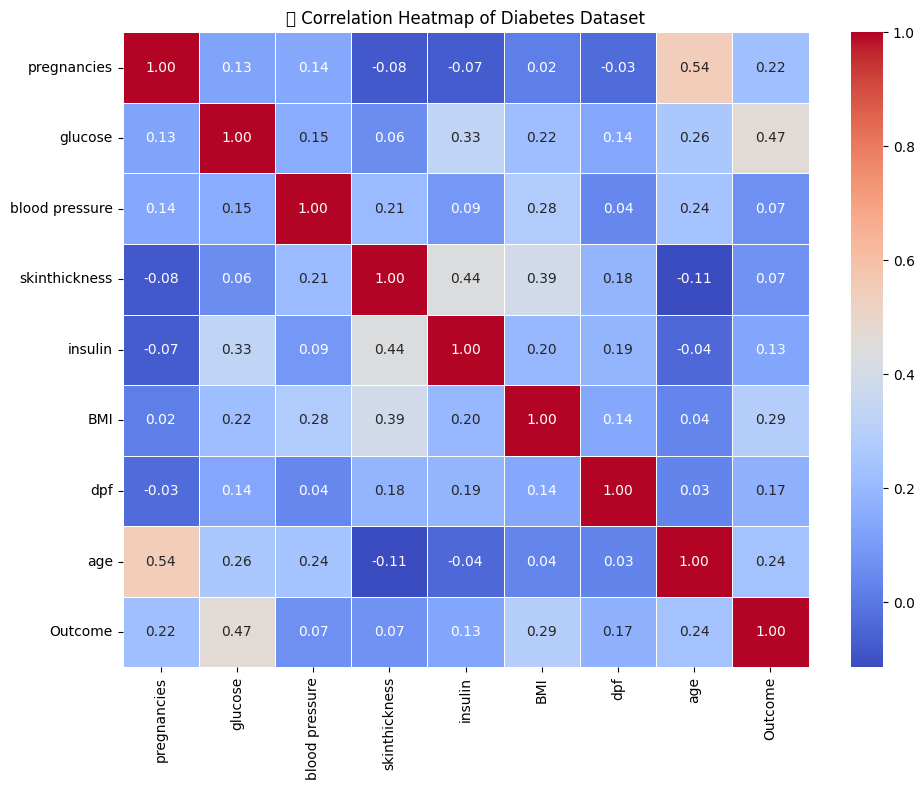

In [8]:
# Correlation matrix for all numeric features
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔗 Correlation Heatmap of Diabetes Dataset")
plt.tight_layout()
plt.show()


# Box Plots

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


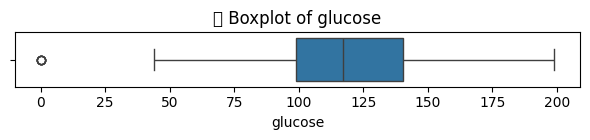

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


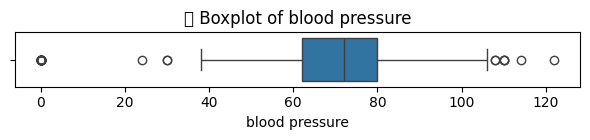

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


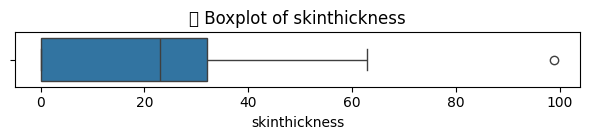

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


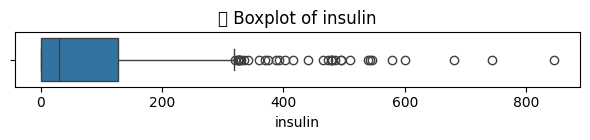

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


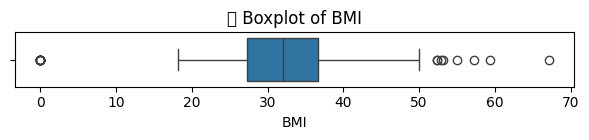

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


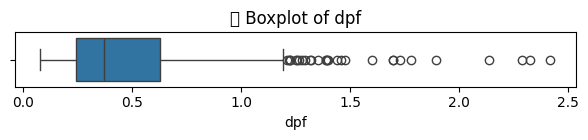

/tmp/ipython-input-550157162.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


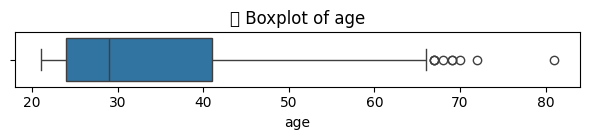

In [9]:
# Select features to plot
features_to_check = ['glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI', 'dpf', 'age']

# Plot boxplots for each
for col in features_to_check:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"📦 Boxplot of {col}")
    plt.tight_layout()
    plt.show()


# Applying Simple Imputer

In [10]:
from sklearn.impute import SimpleImputer

# Make a fresh copy
df_median = df_raw.copy()

# Apply median imputation
median_imputer = SimpleImputer(strategy='median')
df_median[invalid_zero_cols] = median_imputer.fit_transform(df_median[invalid_zero_cols])

# Sanity check
print("✅ Median-imputed dataset:")
print(df_median.isnull().sum())


✅ Median-imputed dataset:
pregnancies       0
glucose           0
blood pressure    0
skinthickness     0
insulin           0
BMI               0
dpf               0
age               0
Outcome           0
dtype: int64


# Implementing Fair Cut Imputer

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

def faircut_impute_verbose(df, strategy="mean", max_depth=5, reduce_to_6=True, target_col="Outcome"):
    df_imputed = df.copy()
    numeric_cols = df_imputed.select_dtypes(include=np.number).columns.drop(target_col)

    tree_imputed_count = 0
    fallback_count = 0

    for col in numeric_cols:
        if df_imputed[col].isnull().sum() == 0:
            continue

        train_data = df_imputed[df_imputed[col].notnull()]
        missing_data = df_imputed[df_imputed[col].isnull()]

        if len(missing_data) == 0 or len(train_data) < 10:
            df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
            fallback_count += 1
            continue

        try:
            X_train = train_data.drop(columns=[col, target_col])
            y_train = train_data[col]

            if X_train.isnull().sum().sum() > 0:
                X_train = SimpleImputer(strategy=strategy).fit_transform(X_train)

            tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
            tree.fit(X_train, y_train)

            X_missing = missing_data.drop(columns=[col, target_col])
            if X_missing.isnull().sum().sum() > 0:
                X_missing = SimpleImputer(strategy=strategy).fit_transform(X_missing)

            imputed_values = tree.predict(X_missing)
            df_imputed.loc[df_imputed[col].isnull(), col] = imputed_values
            tree_imputed_count += 1

        except Exception as e:
            df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
            fallback_count += 1
            print(f"[Fallback on {col}] Reason: {e}")

    print(f"\n🌲 Tree-based imputations: {tree_imputed_count}")
    print(f"📉 Median fallback imputations: {fallback_count}")

    if reduce_to_6:
        keep_cols = ['glucose', 'BMI', 'age', 'pregnancies', 'blood pressure', 'dpf']
        if all(col in df_imputed.columns for col in keep_cols):
            df_imputed = df_imputed[keep_cols + [target_col]]
        else:
            print("⚠️ Warning: Some selected columns not found — skipping reduction.")

    return df_imputed


In [12]:
df_faircut = faircut_impute_verbose(df_raw)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['insulin']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/tmp/ipython-input-1315561383.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].median(), inplace=True)
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['insulin']. At leas

[Fallback on blood pressure] Reason: X has 6 features, but DecisionTreeRegressor is expecting 7 features as input.
[Fallback on skinthickness] Reason: X has 6 features, but DecisionTreeRegressor is expecting 7 features as input.

🌲 Tree-based imputations: 3
📉 Median fallback imputations: 2


# Defining Train and Test Split

In [13]:
from sklearn.model_selection import train_test_split

# === 1. Median-Imputed Dataset ===
X = df.drop(columns='Outcome')
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42  # Ensure reproducibility
)

# === 2. FairCutTree-Imputed Dataset ===
Xf = df_faircut.drop(columns='Outcome')
yf = df_faircut['Outcome']

Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    Xf, yf,
    test_size=0.2,
    stratify=yf,
    random_state=42  # Same for consistency
)


# Standard Scaler for both Imputed Data sets

In [14]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# === 1. Scale the full feature dataset (df) ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === 2. Apply SMOTE on training set only ===
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("✅ SMOTE applied on median-imputed dataset")
print(f"Resampled train shape: {X_train_res.shape}")
print(f"Original test shape  : {X_test_scaled.shape}")


# === 3. Scale the FairCutTree-imputed dataset ===
scaler_faircut = StandardScaler()
Xf_train_scaled = scaler_faircut.fit_transform(Xf_train)
Xf_test_scaled = scaler_faircut.transform(Xf_test)

# === 4. Apply SMOTE on FairCutTree training set ===
Xf_train_res, yf_train_res = smote.fit_resample(Xf_train_scaled, yf_train)

print("\n✅ SMOTE applied on FairCutTree-imputed dataset")
print(f"Resampled train shape: {Xf_train_res.shape}")
print(f"Original test shape  : {Xf_test_scaled.shape}")


✅ SMOTE applied on median-imputed dataset
Resampled train shape: (800, 8)
Original test shape  : (154, 8)

✅ SMOTE applied on FairCutTree-imputed dataset
Resampled train shape: (800, 6)
Original test shape  : (154, 6)


# Evaliuation Metrics

In [15]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def false_negative_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fn = cm[1][0]
    tp = cm[1][1]
    return fn / (fn + tp) if (fn + tp) > 0 else 0

def false_positive_rate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0][1]
    tn = cm[0][0]
    return fp / (fp + tn) if (fp + tn) > 0 else 0

def balanced_error_rate(y_true, y_pred):
    fnr = false_negative_rate(y_true, y_pred)
    fpr = false_positive_rate(y_true, y_pred)
    return 0.5 * (fnr + fpr)

def evaluate_model(y_true, y_pred, y_proba, model_name="Model"):
    print(f"\n=== 🔍 Evaluation for: {model_name} ===\n")

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc_score = roc_auc_score(y_true, y_proba)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

    # Metrics
    print("🔢 Classification Report:")
    print(classification_report(y_true, y_pred))

    print("📊 Key Metrics:")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC:   {auc_score:.4f}")

    # Fairness metrics
    fnr = false_negative_rate(y_true, y_pred)
    fprate = false_positive_rate(y_true, y_pred)
    ber = balanced_error_rate(y_true, y_pred)

    print("\n⚖️ Fairness Metrics:")
    print(f"False Negative Rate (FNR): {fnr:.4f}")
    print(f"False Positive Rate (FPR): {fprate:.4f}")
    print(f"Balanced Error Rate (BER): {ber:.4f}")


# Logistic Regression


=== 🔍 Evaluation for: Logistic Regression (Median Before SMOTE) ===



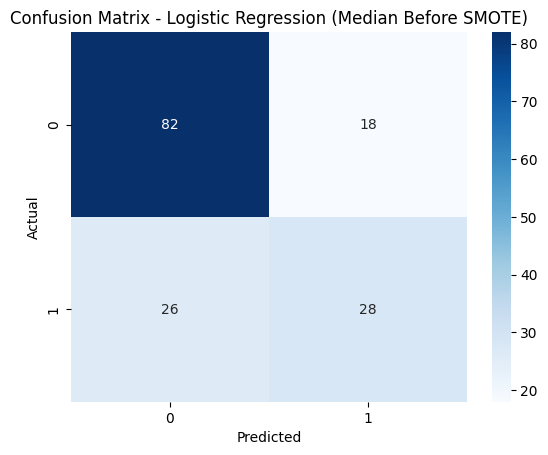

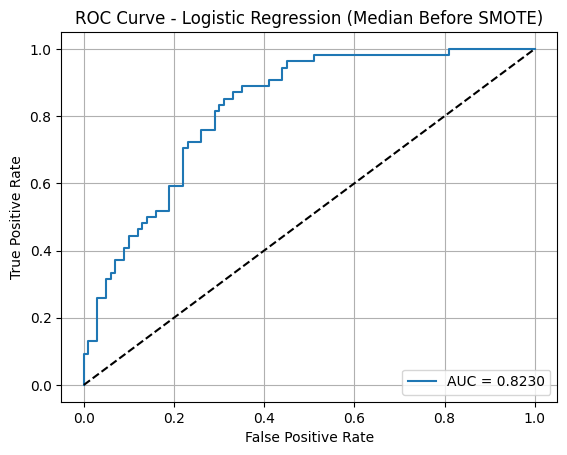

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

📊 Key Metrics:
Accuracy:  0.7143
Precision: 0.6087
Recall:    0.5185
F1 Score:  0.5600
ROC AUC:   0.8230

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4815
False Positive Rate (FPR): 0.1800
Balanced Error Rate (BER): 0.3307

=== 🔍 Evaluation for: Logistic Regression (Median After SMOTE) ===



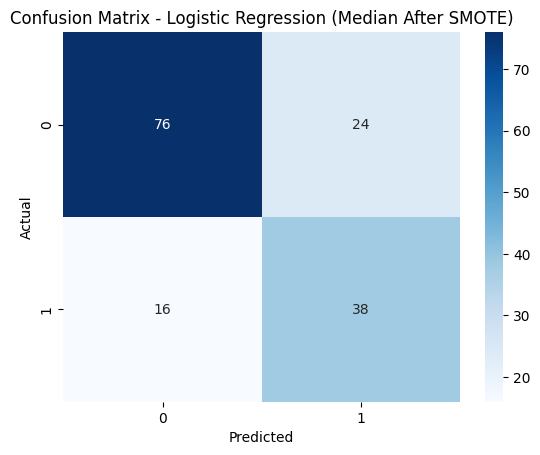

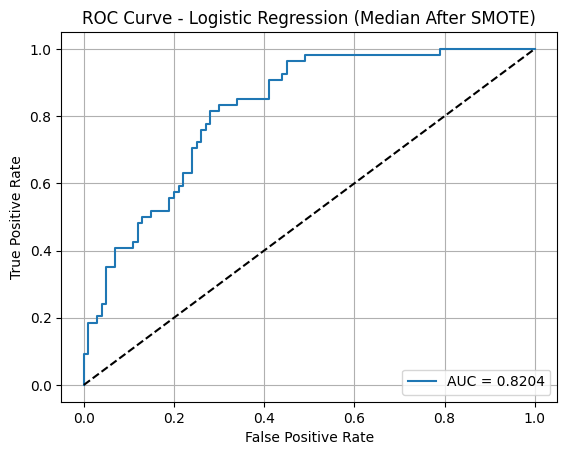

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       100
           1       0.61      0.70      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

📊 Key Metrics:
Accuracy:  0.7403
Precision: 0.6129
Recall:    0.7037
F1 Score:  0.6552
ROC AUC:   0.8204

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2963
False Positive Rate (FPR): 0.2400
Balanced Error Rate (BER): 0.2681


In [16]:
from sklearn.linear_model import LogisticRegression

# === Median Imputation: Before SMOTE ===
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_logreg, y_proba_logreg, model_name="Logistic Regression (Median Before SMOTE)")

# === Median Imputation: After SMOTE ===
logreg_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_smote.fit(X_train_res, y_train_res)

y_pred_logreg_smote = logreg_smote.predict(X_test_scaled)
y_proba_logreg_smote = logreg_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_logreg_smote, y_proba_logreg_smote, model_name="Logistic Regression (Median After SMOTE)")



=== 🔍 Evaluation for: Logistic Regression (FairCut Before SMOTE) ===



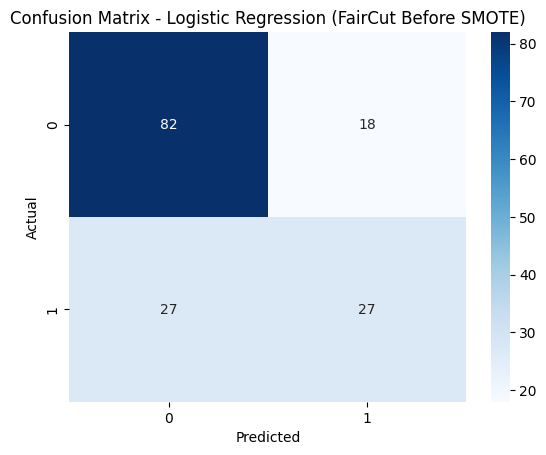

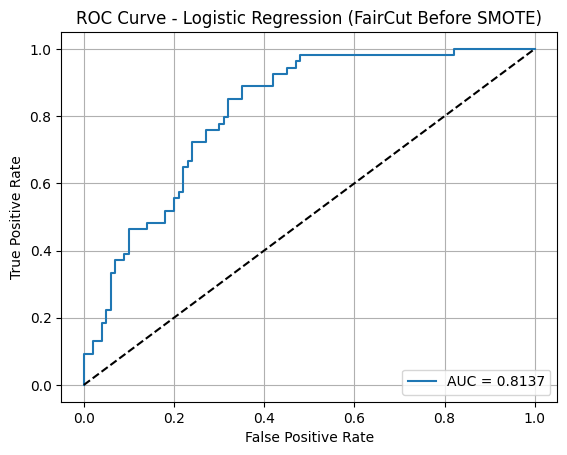

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

📊 Key Metrics:
Accuracy:  0.7078
Precision: 0.6000
Recall:    0.5000
F1 Score:  0.5455
ROC AUC:   0.8137

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.5000
False Positive Rate (FPR): 0.1800
Balanced Error Rate (BER): 0.3400

=== 🔍 Evaluation for: Logistic Regression (FairCut After SMOTE) ===



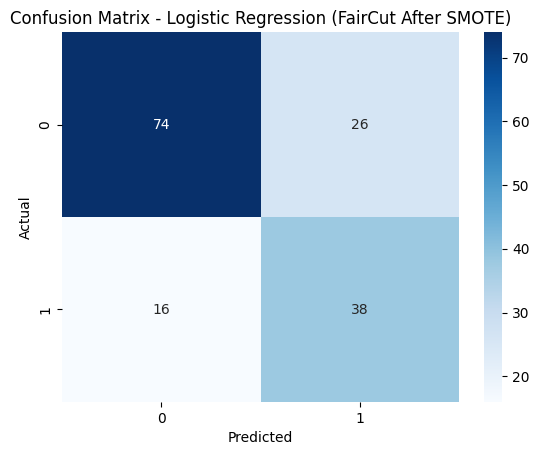

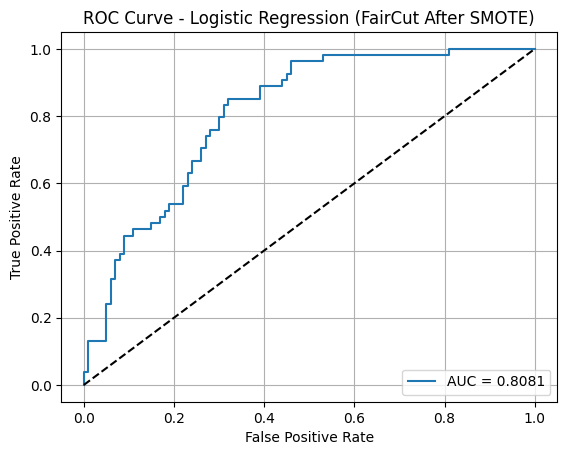

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154

📊 Key Metrics:
Accuracy:  0.7273
Precision: 0.5938
Recall:    0.7037
F1 Score:  0.6441
ROC AUC:   0.8081

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2963
False Positive Rate (FPR): 0.2600
Balanced Error Rate (BER): 0.2781


In [17]:
from sklearn.linear_model import LogisticRegression

# === FairCut: Before SMOTE ===
logreg_fc = LogisticRegression(max_iter=1000, random_state=42)
logreg_fc.fit(Xf_train_scaled, yf_train)

yf_pred_fc = logreg_fc.predict(Xf_test_scaled)
yf_proba_fc = logreg_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_fc, yf_proba_fc, model_name="Logistic Regression (FairCut Before SMOTE)")

# === FairCut: After SMOTE ===
logreg_fc_smote = LogisticRegression(max_iter=1000, random_state=42)
logreg_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_fc_smote = logreg_fc_smote.predict(Xf_test_scaled)
yf_proba_fc_smote = logreg_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_fc_smote, yf_proba_fc_smote, model_name="Logistic Regression (FairCut After SMOTE)")


# Top performing Model SHAP for Logistic Regression (FairCut + SMOTE)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


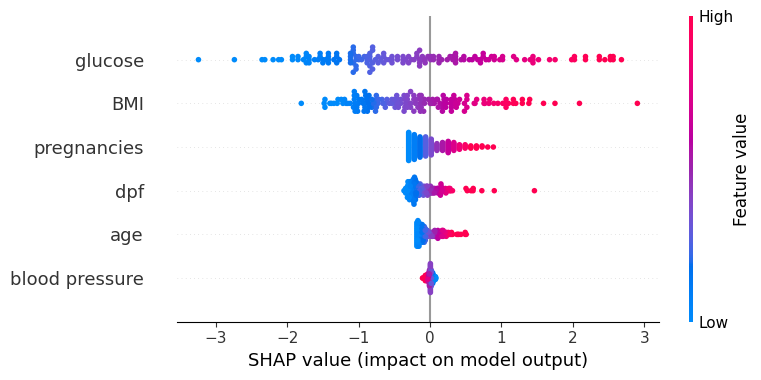

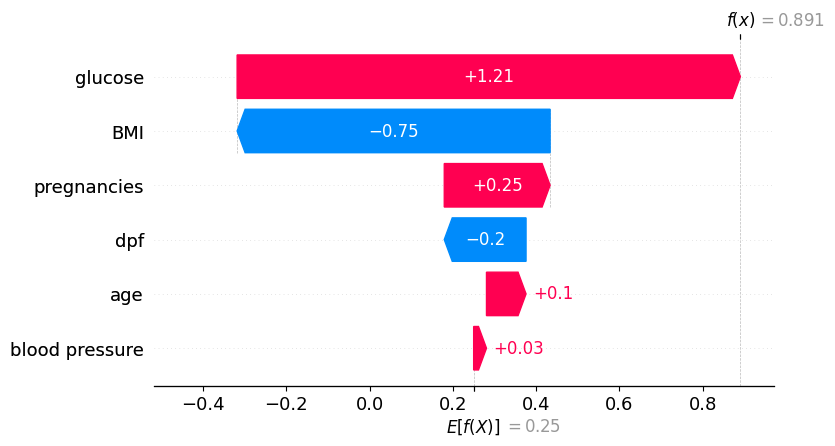

In [18]:
import shap
import matplotlib.pyplot as plt

# SHAP Explainer
explainer = shap.LinearExplainer(logreg_fc_smote, Xf_train_res, feature_perturbation="interventional")
shap_values = explainer.shap_values(Xf_test_scaled)

# Beeswarm Plot
shap.summary_plot(shap_values, Xf_test_scaled, feature_names=Xf.columns)

# Waterfall plot for one prediction
shap.initjs()
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names=Xf.columns)


# SVM


=== 🔍 Evaluation for: SVM (Median Before SMOTE) ===



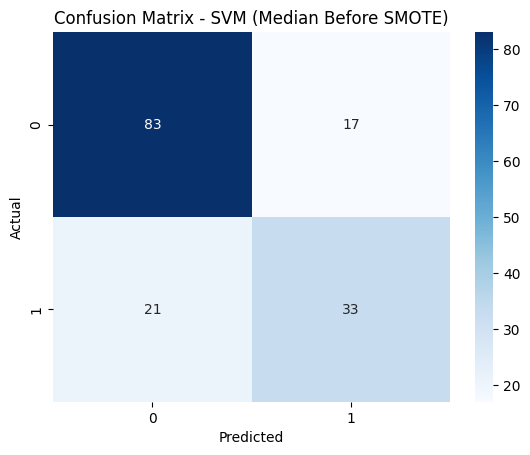

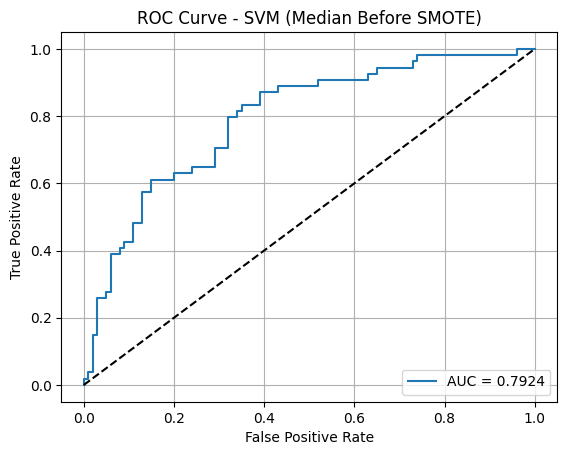

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

📊 Key Metrics:
Accuracy:  0.7532
Precision: 0.6600
Recall:    0.6111
F1 Score:  0.6346
ROC AUC:   0.7924

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3889
False Positive Rate (FPR): 0.1700
Balanced Error Rate (BER): 0.2794

=== 🔍 Evaluation for: SVM (Median After SMOTE) ===



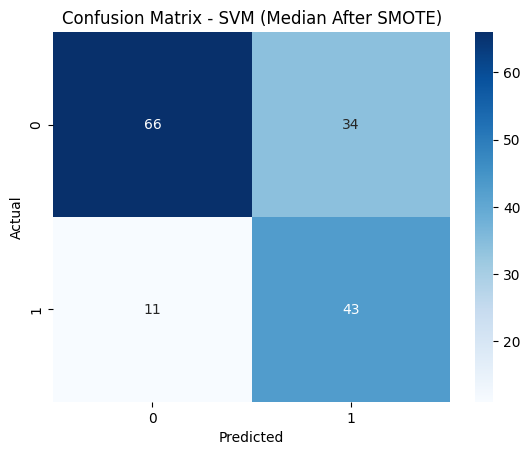

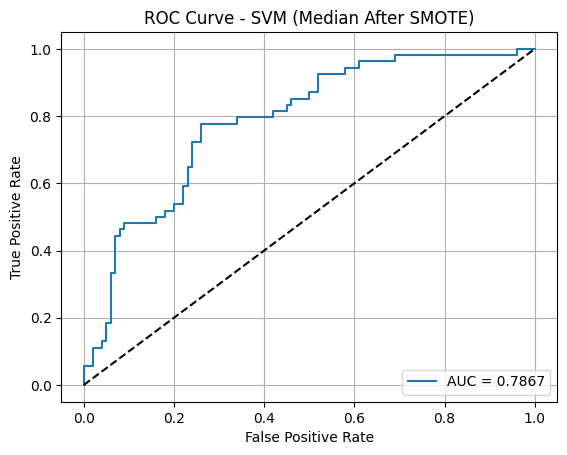

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       100
           1       0.56      0.80      0.66        54

    accuracy                           0.71       154
   macro avg       0.71      0.73      0.70       154
weighted avg       0.75      0.71      0.71       154

📊 Key Metrics:
Accuracy:  0.7078
Precision: 0.5584
Recall:    0.7963
F1 Score:  0.6565
ROC AUC:   0.7867

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2037
False Positive Rate (FPR): 0.3400
Balanced Error Rate (BER): 0.2719


In [19]:
from sklearn.svm import SVC

# === SVM: Median-Imputed (Before SMOTE) ===
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_svm, y_proba_svm, model_name="SVM (Median Before SMOTE)")

# === SVM: Median-Imputed (After SMOTE) ===
svm_smote = SVC(kernel='rbf', probability=True, random_state=42)
svm_smote.fit(X_train_res, y_train_res)

y_pred_svm_smote = svm_smote.predict(X_test_scaled)
y_proba_svm_smote = svm_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_svm_smote, y_proba_svm_smote, model_name="SVM (Median After SMOTE)")



=== 🔍 Evaluation for: SVM (FairCut Before SMOTE) ===



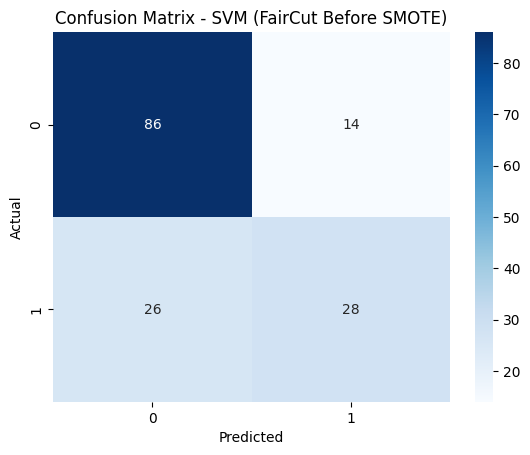

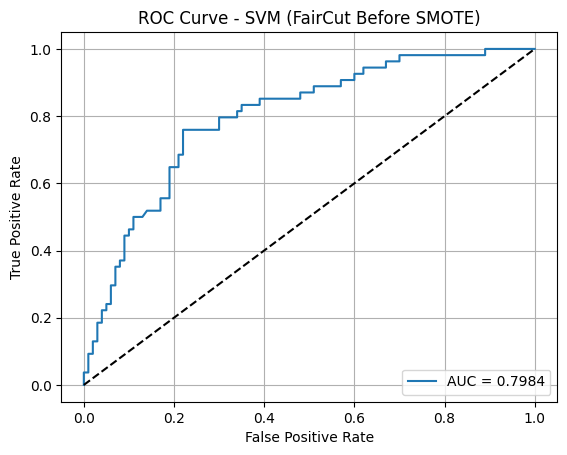

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154

📊 Key Metrics:
Accuracy:  0.7403
Precision: 0.6667
Recall:    0.5185
F1 Score:  0.5833
ROC AUC:   0.7984

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4815
False Positive Rate (FPR): 0.1400
Balanced Error Rate (BER): 0.3107

=== 🔍 Evaluation for: SVM (FairCut After SMOTE) ===



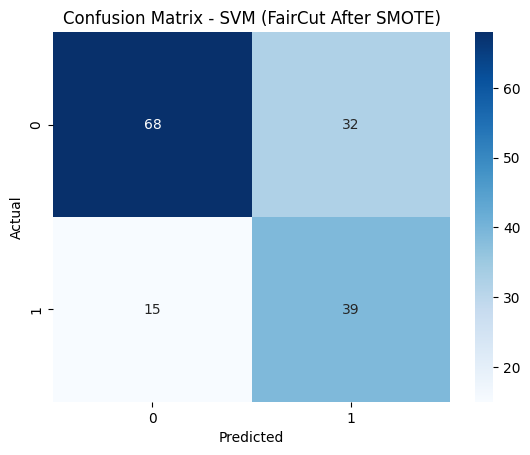

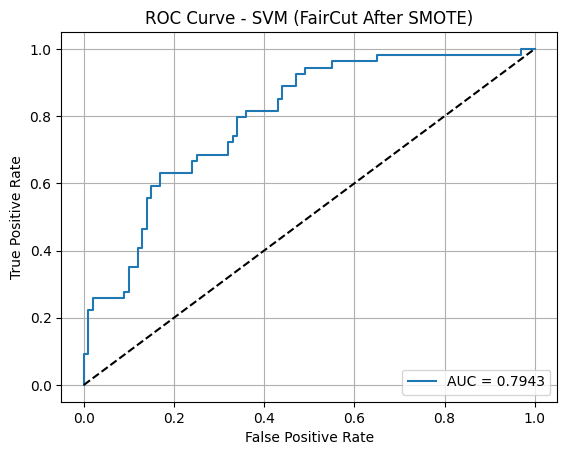

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       100
           1       0.55      0.72      0.62        54

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154

📊 Key Metrics:
Accuracy:  0.6948
Precision: 0.5493
Recall:    0.7222
F1 Score:  0.6240
ROC AUC:   0.7943

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2778
False Positive Rate (FPR): 0.3200
Balanced Error Rate (BER): 0.2989


In [20]:
# === SVM: FairCut-Imputed (Before SMOTE) ===
svm_fc = SVC(kernel='rbf', probability=True, random_state=42)
svm_fc.fit(Xf_train_scaled, yf_train)

yf_pred_svm = svm_fc.predict(Xf_test_scaled)
yf_proba_svm = svm_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_svm, yf_proba_svm, model_name="SVM (FairCut Before SMOTE)")

# === SVM: FairCut-Imputed (After SMOTE) ===
svm_fc_smote = SVC(kernel='rbf', probability=True, random_state=42)
svm_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_svm_smote = svm_fc_smote.predict(Xf_test_scaled)
yf_proba_svm_smote = svm_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_svm_smote, yf_proba_svm_smote, model_name="SVM (FairCut After SMOTE)")


# KNN


=== 🔍 Evaluation for: KNN (Median Before SMOTE) ===



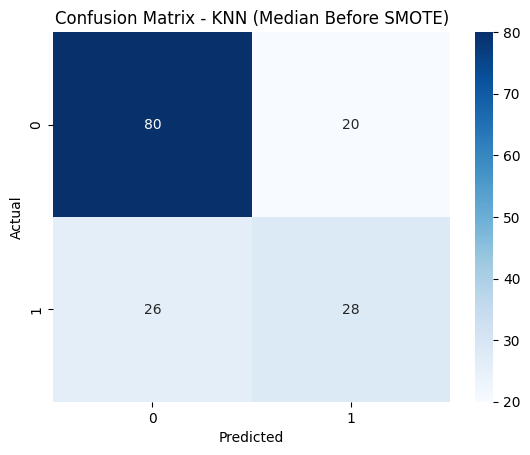

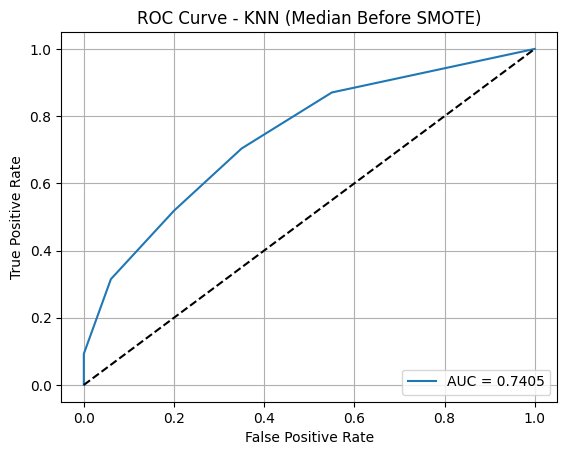

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

📊 Key Metrics:
Accuracy:  0.7013
Precision: 0.5833
Recall:    0.5185
F1 Score:  0.5490
ROC AUC:   0.7405

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4815
False Positive Rate (FPR): 0.2000
Balanced Error Rate (BER): 0.3407

=== 🔍 Evaluation for: KNN (Median After SMOTE) ===



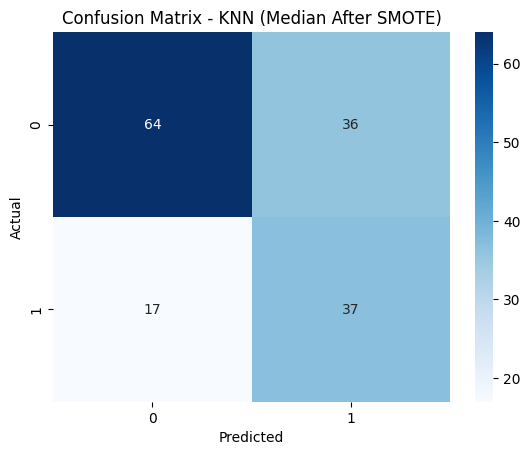

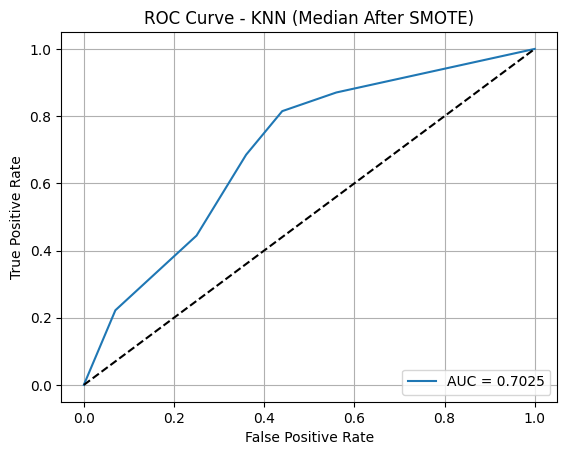

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       100
           1       0.51      0.69      0.58        54

    accuracy                           0.66       154
   macro avg       0.65      0.66      0.64       154
weighted avg       0.69      0.66      0.66       154

📊 Key Metrics:
Accuracy:  0.6558
Precision: 0.5068
Recall:    0.6852
F1 Score:  0.5827
ROC AUC:   0.7025

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3148
False Positive Rate (FPR): 0.3600
Balanced Error Rate (BER): 0.3374


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# === KNN: Median-Imputed (Before SMOTE) ===
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_knn, y_proba_knn, model_name="KNN (Median Before SMOTE)")

# === KNN: Median-Imputed (After SMOTE) ===
knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_train_res, y_train_res)

y_pred_knn_smote = knn_smote.predict(X_test_scaled)
y_proba_knn_smote = knn_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_knn_smote, y_proba_knn_smote, model_name="KNN (Median After SMOTE)")



=== 🔍 Evaluation for: KNN (FairCut Before SMOTE) ===



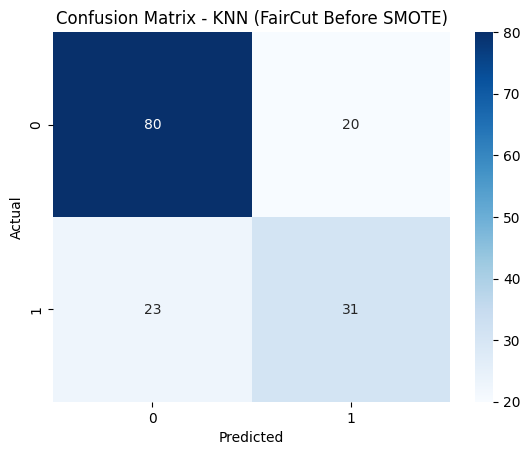

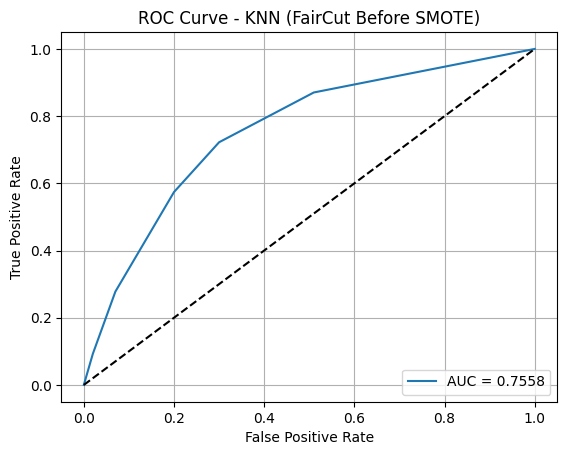

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.61      0.57      0.59        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154

📊 Key Metrics:
Accuracy:  0.7208
Precision: 0.6078
Recall:    0.5741
F1 Score:  0.5905
ROC AUC:   0.7558

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4259
False Positive Rate (FPR): 0.2000
Balanced Error Rate (BER): 0.3130

=== 🔍 Evaluation for: KNN (FairCut After SMOTE) ===



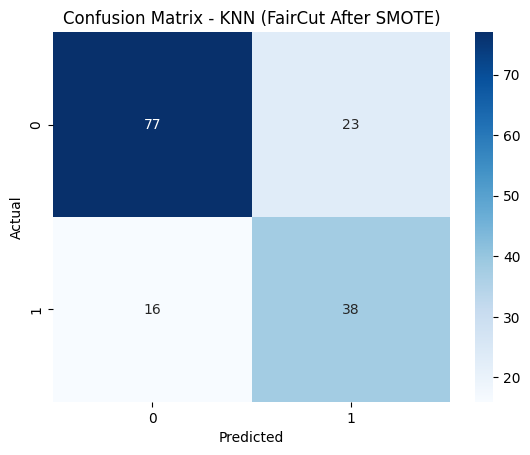

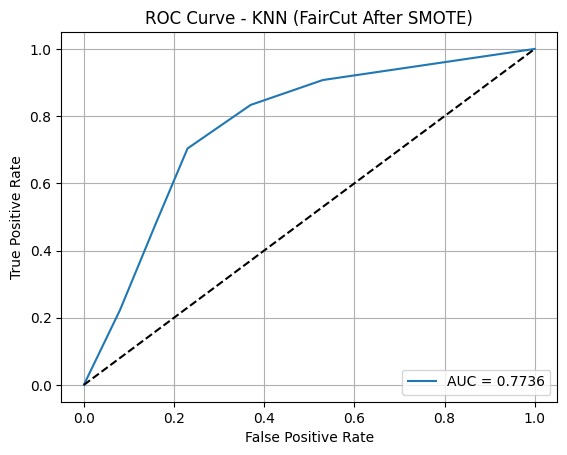

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.62      0.70      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

📊 Key Metrics:
Accuracy:  0.7468
Precision: 0.6230
Recall:    0.7037
F1 Score:  0.6609
ROC AUC:   0.7736

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2963
False Positive Rate (FPR): 0.2300
Balanced Error Rate (BER): 0.2631


In [22]:
# === KNN: FairCut-Imputed (Before SMOTE) ===
knn_fc = KNeighborsClassifier(n_neighbors=5)
knn_fc.fit(Xf_train_scaled, yf_train)

yf_pred_knn = knn_fc.predict(Xf_test_scaled)
yf_proba_knn = knn_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_knn, yf_proba_knn, model_name="KNN (FairCut Before SMOTE)")

# === KNN: FairCut-Imputed (After SMOTE) ===
knn_fc_smote = KNeighborsClassifier(n_neighbors=5)
knn_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_knn_smote = knn_fc_smote.predict(Xf_test_scaled)
yf_proba_knn_smote = knn_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_knn_smote, yf_proba_knn_smote, model_name="KNN (FairCut After SMOTE)")


# Random Forest Model


=== 🔍 Evaluation for: Random Forest (Median Before SMOTE) ===



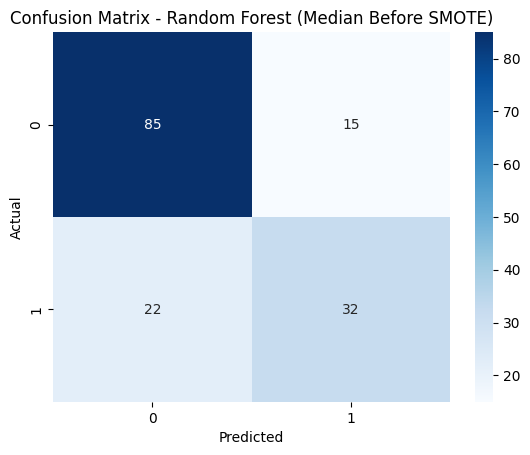

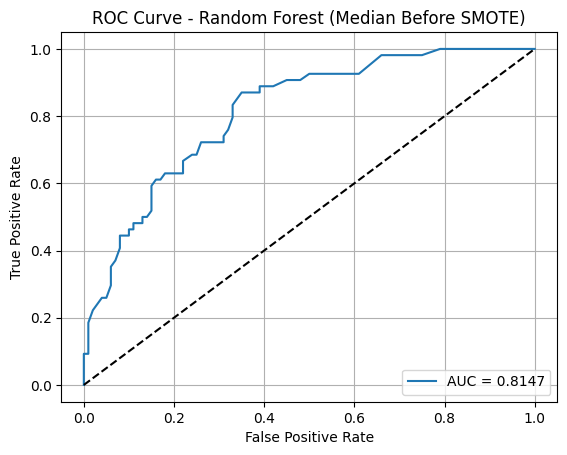

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

📊 Key Metrics:
Accuracy:  0.7597
Precision: 0.6809
Recall:    0.5926
F1 Score:  0.6337
ROC AUC:   0.8147

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4074
False Positive Rate (FPR): 0.1500
Balanced Error Rate (BER): 0.2787

=== 🔍 Evaluation for: Random Forest (Median After SMOTE) ===



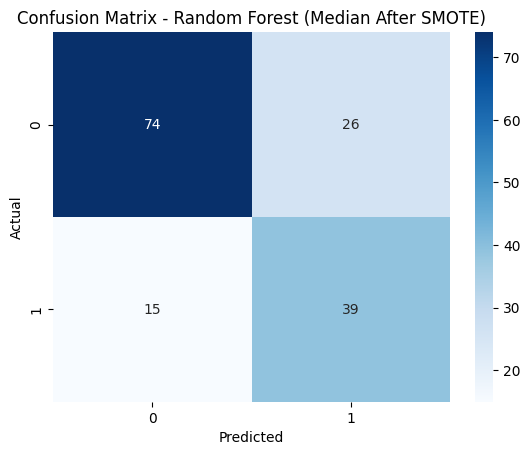

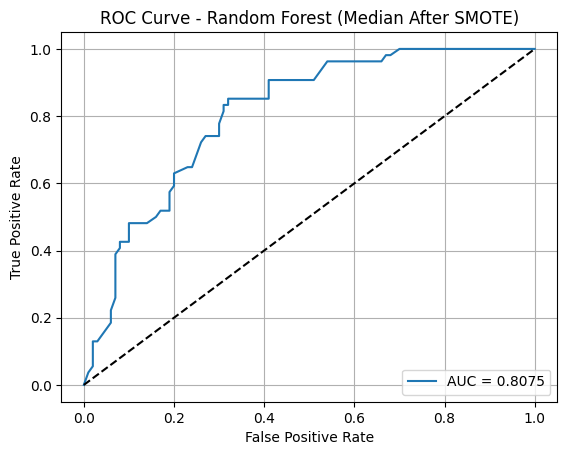

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       100
           1       0.60      0.72      0.66        54

    accuracy                           0.73       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154

📊 Key Metrics:
Accuracy:  0.7338
Precision: 0.6000
Recall:    0.7222
F1 Score:  0.6555
ROC AUC:   0.8075

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2778
False Positive Rate (FPR): 0.2600
Balanced Error Rate (BER): 0.2689


In [23]:
from sklearn.ensemble import RandomForestClassifier

# === Random Forest: Median-Imputed (Before SMOTE) ===
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_rf, y_proba_rf, model_name="Random Forest (Median Before SMOTE)")

# === Random Forest: Median-Imputed (After SMOTE) ===
rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_res, y_train_res)

y_pred_rf_smote = rf_smote.predict(X_test_scaled)
y_proba_rf_smote = rf_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_rf_smote, y_proba_rf_smote, model_name="Random Forest (Median After SMOTE)")



=== 🔍 Evaluation for: Random Forest (FairCut Before SMOTE) ===



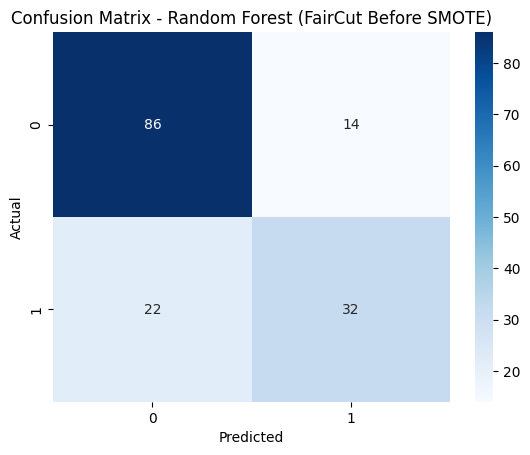

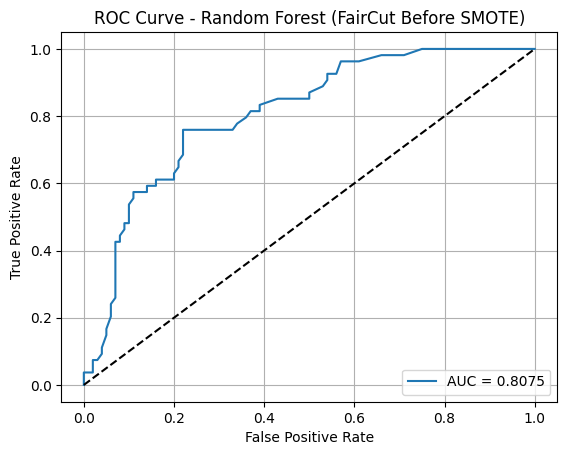

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154

📊 Key Metrics:
Accuracy:  0.7662
Precision: 0.6957
Recall:    0.5926
F1 Score:  0.6400
ROC AUC:   0.8075

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4074
False Positive Rate (FPR): 0.1400
Balanced Error Rate (BER): 0.2737

=== 🔍 Evaluation for: Random Forest (FairCut After SMOTE) ===



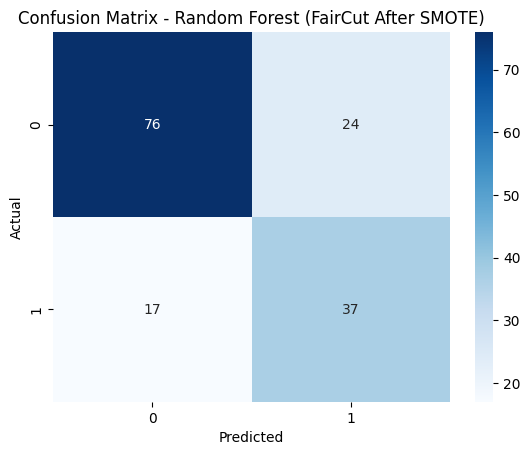

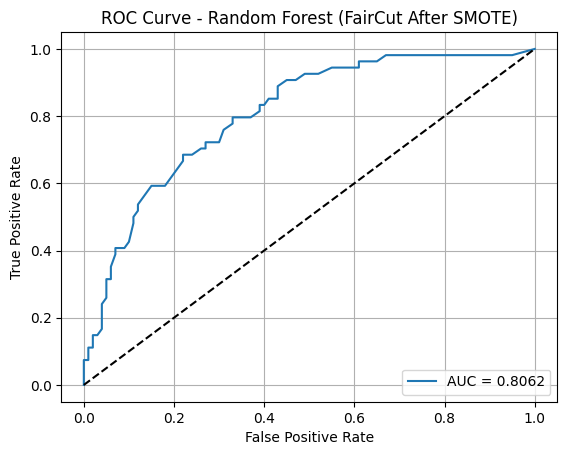

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

📊 Key Metrics:
Accuracy:  0.7338
Precision: 0.6066
Recall:    0.6852
F1 Score:  0.6435
ROC AUC:   0.8062

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3148
False Positive Rate (FPR): 0.2400
Balanced Error Rate (BER): 0.2774


In [24]:
# === Random Forest: FairCut-Imputed (Before SMOTE) ===
rf_fc = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fc.fit(Xf_train_scaled, yf_train)

yf_pred_rf = rf_fc.predict(Xf_test_scaled)
yf_proba_rf = rf_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_rf, yf_proba_rf, model_name="Random Forest (FairCut Before SMOTE)")

# === Random Forest: FairCut-Imputed (After SMOTE) ===
rf_fc_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_rf_smote = rf_fc_smote.predict(Xf_test_scaled)
yf_proba_rf_smote = rf_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_rf_smote, yf_proba_rf_smote, model_name="Random Forest (FairCut After SMOTE)")


# XG Boost

In [25]:
!pip install xgboost


In [26]:
from xgboost import XGBClassifier


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:01:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 🔍 Evaluation for: XGBoost (Median Before SMOTE) ===



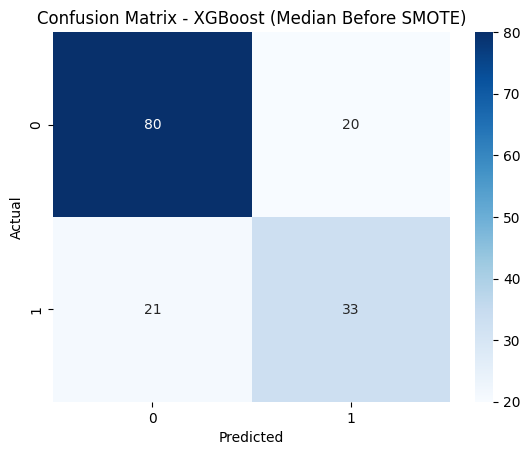

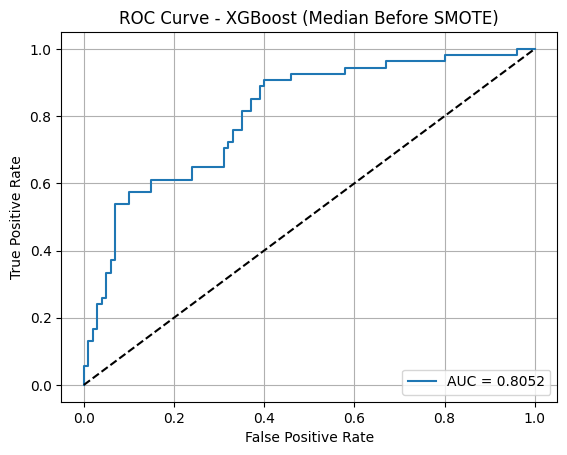

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

📊 Key Metrics:
Accuracy:  0.7338
Precision: 0.6226
Recall:    0.6111
F1 Score:  0.6168
ROC AUC:   0.8052

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3889
False Positive Rate (FPR): 0.2000
Balanced Error Rate (BER): 0.2944


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:01:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 🔍 Evaluation for: XGBoost (Median After SMOTE) ===



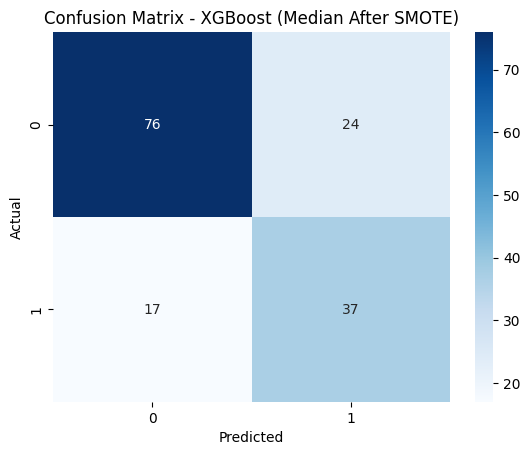

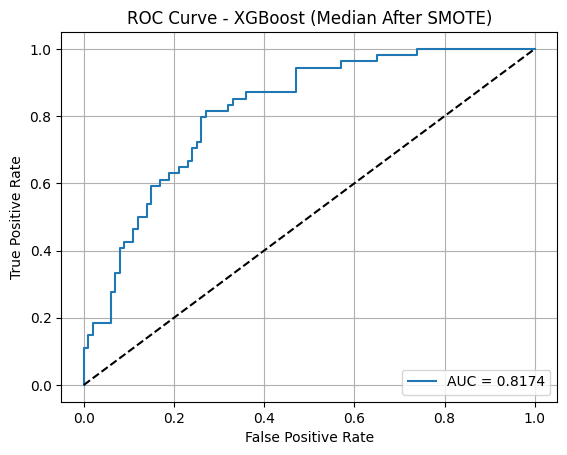

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154

📊 Key Metrics:
Accuracy:  0.7338
Precision: 0.6066
Recall:    0.6852
F1 Score:  0.6435
ROC AUC:   0.8174

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3148
False Positive Rate (FPR): 0.2400
Balanced Error Rate (BER): 0.2774


In [27]:
# === XGBoost: Median-Imputed (Before SMOTE) ===
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
y_proba_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_xgb, y_proba_xgb, model_name="XGBoost (Median Before SMOTE)")

# === XGBoost: Median-Imputed (After SMOTE) ===
xgb_smote = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_smote.fit(X_train_res, y_train_res)

y_pred_xgb_smote = xgb_smote.predict(X_test_scaled)
y_proba_xgb_smote = xgb_smote.predict_proba(X_test_scaled)[:, 1]

evaluate_model(y_test, y_pred_xgb_smote, y_proba_xgb_smote, model_name="XGBoost (Median After SMOTE)")


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:01:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 🔍 Evaluation for: XGBoost (FairCut Before SMOTE) ===



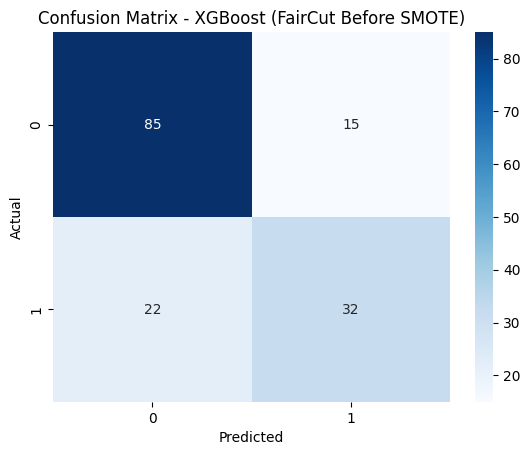

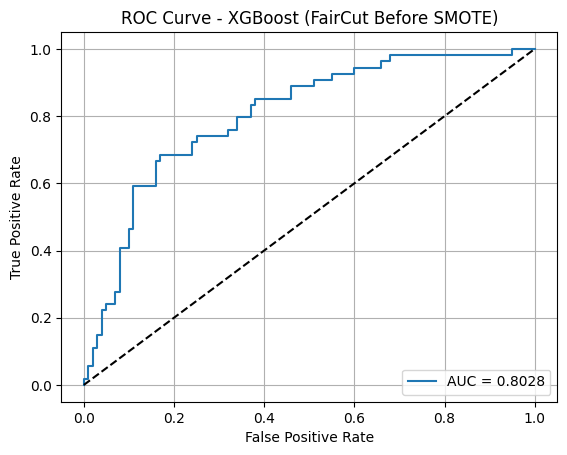

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

📊 Key Metrics:
Accuracy:  0.7597
Precision: 0.6809
Recall:    0.5926
F1 Score:  0.6337
ROC AUC:   0.8028

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.4074
False Positive Rate (FPR): 0.1500
Balanced Error Rate (BER): 0.2787


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:01:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== 🔍 Evaluation for: XGBoost (FairCut After SMOTE) ===



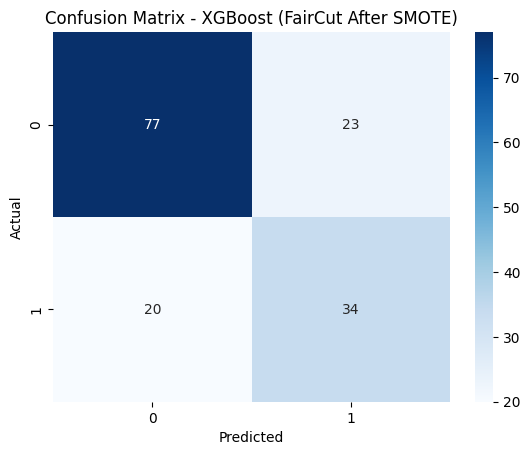

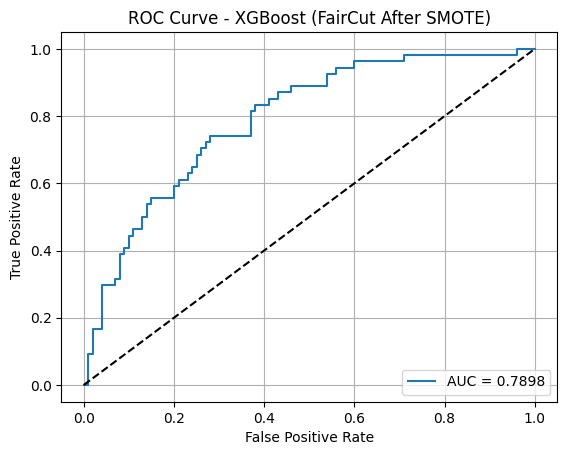

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       100
           1       0.60      0.63      0.61        54

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

📊 Key Metrics:
Accuracy:  0.7208
Precision: 0.5965
Recall:    0.6296
F1 Score:  0.6126
ROC AUC:   0.7898

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.3704
False Positive Rate (FPR): 0.2300
Balanced Error Rate (BER): 0.3002


In [28]:
# === XGBoost: FairCut-Imputed (Before SMOTE) ===
xgb_fc = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_fc.fit(Xf_train_scaled, yf_train)

yf_pred_xgb = xgb_fc.predict(Xf_test_scaled)
yf_proba_xgb = xgb_fc.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_xgb, yf_proba_xgb, model_name="XGBoost (FairCut Before SMOTE)")

# === XGBoost: FairCut-Imputed (After SMOTE) ===
xgb_fc_smote = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_fc_smote.fit(Xf_train_res, yf_train_res)

yf_pred_xgb_smote = xgb_fc_smote.predict(Xf_test_scaled)
yf_proba_xgb_smote = xgb_fc_smote.predict_proba(Xf_test_scaled)[:, 1]

evaluate_model(yf_test, yf_pred_xgb_smote, yf_proba_xgb_smote, model_name="XGBoost (FairCut After SMOTE)")


SHAP shape: (154, 8)
X_test_scaled shape: (154, 8)


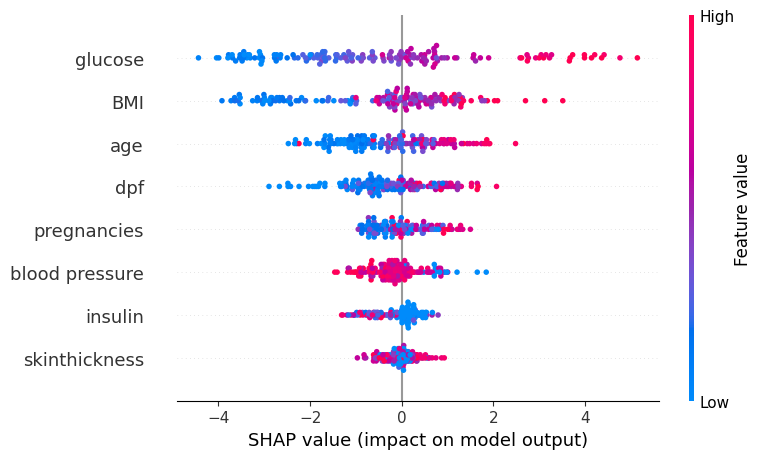

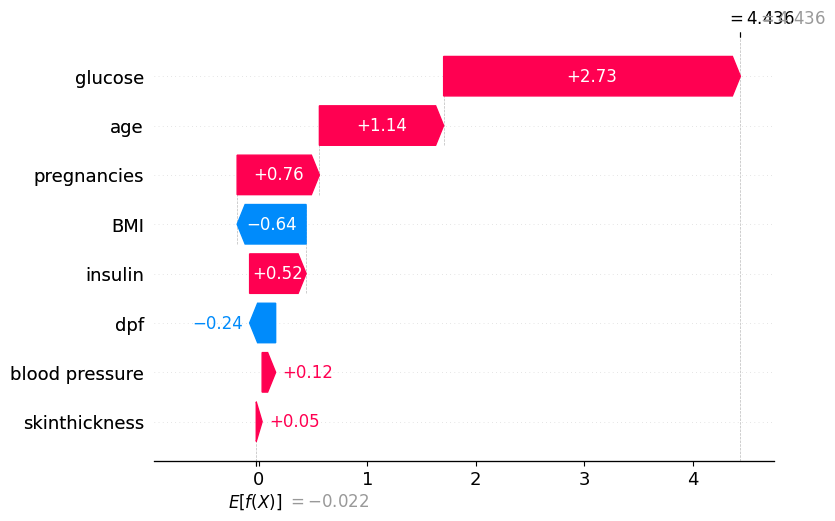

In [29]:

# === 2. SHAP Tree Explainer
explainer_xgb = shap.TreeExplainer(xgb_smote)
shap_values_xgb = explainer_xgb.shap_values(X_test_scaled, check_additivity=False)

# === 3. Confirm Shape (Expect: (n_samples, n_features))
print("SHAP shape:", shap_values_xgb.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

# === 4. Beeswarm Plot
shap.summary_plot(shap_values_xgb, X_test_scaled, feature_names=X.columns)

# === 5. Waterfall Plot for One Sample
shap.initjs()
shap.plots._waterfall.waterfall_legacy(
    explainer_xgb.expected_value,
    shap_values_xgb[0],
    feature_names=X.columns
)


# Tabular Transformers

In [30]:
!pip install pytorch-tabnet --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 57.0 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.64462 | train_auc: 0.75171 | train_accuracy: 0.74104 | val_auc: 0.71944 | val_accuracy: 0.7013  |  0:00:00s
epoch 10 | loss: 0.48548 | train_auc: 0.8695  | train_accuracy: 0.76384 | val_auc: 0.77148 | val_accuracy: 0.72078 |  0:00:08s
epoch 20 | loss: 0.47747 | train_auc: 0.88255 | train_accuracy: 0.78502 | val_auc: 0.80963 | val_accuracy: 0.73377 |  0:00:17s
epoch 30 | loss: 0.45824 | train_auc: 0.89118 | train_accuracy: 0.80293 | val_auc: 0.7913  | val_accuracy: 0.7013  |  0:00:25s
epoch 40 | loss: 0.46438 | train_auc: 0.90228 | train_accuracy: 0.80456 | val_auc: 0.78981 | val_accuracy: 0.72727 |  0:00:35s
epoch 50 | loss: 0.44044 | train_auc: 0.90909 | train_accuracy: 0.81759 | val_auc: 0.79    | val_accuracy: 0.71429 |  0:00:42s
epoch 60 | loss: 0.44691 | train_auc: 0.90741 | train_accuracy: 0.80619 | val_auc: 0.80556 | val_accuracy: 0.74026 |  0:00:51s

Early stopping occurred at epoch 64 with best_epoch = 34 and best_val_accuracy = 0.74675


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== 🔍 Evaluation for: TabNet (FairCut Before SMOTE) ===



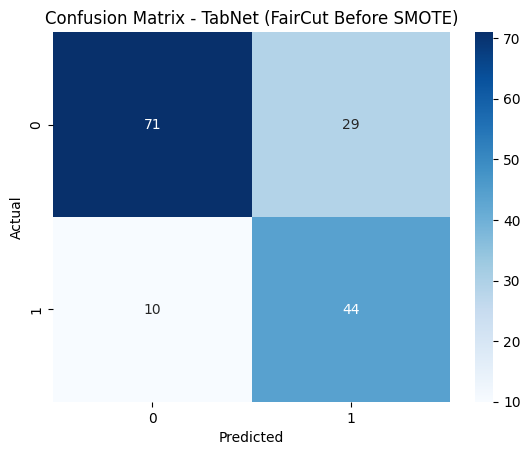

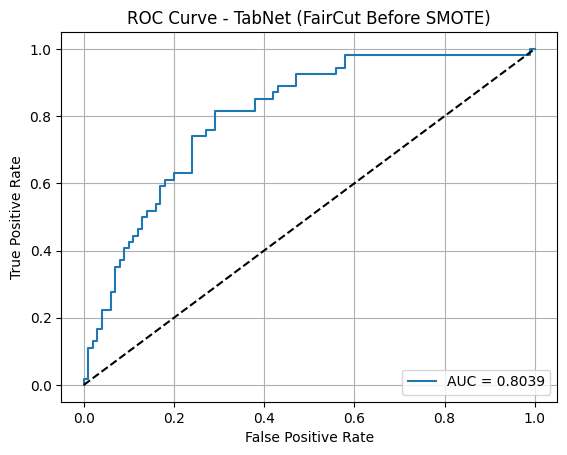

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.78       100
           1       0.60      0.81      0.69        54

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.75       154

📊 Key Metrics:
Accuracy:  0.7468
Precision: 0.6027
Recall:    0.8148
F1 Score:  0.6929
ROC AUC:   0.8039

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.1852
False Positive Rate (FPR): 0.2900
Balanced Error Rate (BER): 0.2376


In [31]:
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.utils.class_weight import compute_class_weight
import torch
import numpy as np

# === Prepare data ===
X_train_tab = Xf_train_scaled.astype(np.float32)
X_test_tab = Xf_test_scaled.astype(np.float32)
y_train_tab = np.array(yf_train).astype(int)
y_test_tab = np.array(yf_test).astype(int)

# === Class weights ===
weights_before = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_tab), y=y_train_tab)
weights_before_tensor = torch.tensor(weights_before, dtype=torch.float32)

# === Define TabNet ===
tabnet_fc_before = TabNetClassifier(
    n_d=8, n_a=8, n_steps=3,
    gamma=1.3,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size": 10, "gamma": 0.9},
    mask_type='entmax',
    seed=42,
    verbose=10
)

# === Train ===
tabnet_fc_before.fit(
    X_train=X_train_tab, y_train=y_train_tab,
    eval_set=[(X_train_tab, y_train_tab), (X_test_tab, y_test_tab)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss(weight=weights_before_tensor)
)

# === Predict and Evaluate ===
y_pred_before = tabnet_fc_before.predict(X_test_tab)
y_proba_before = tabnet_fc_before.predict_proba(X_test_tab)[:, 1]

evaluate_model(y_test_tab, y_pred_before, y_proba_before, model_name="TabNet (FairCut Before SMOTE)")


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.68033 | train_auc: 0.81897 | train_accuracy: 0.74875 | val_auc: 0.7513  | val_accuracy: 0.7013  |  0:00:00s
epoch 10 | loss: 0.46125 | train_auc: 0.88439 | train_accuracy: 0.8075  | val_auc: 0.79481 | val_accuracy: 0.72727 |  0:00:12s
epoch 20 | loss: 0.47358 | train_auc: 0.89111 | train_accuracy: 0.8125  | val_auc: 0.78593 | val_accuracy: 0.7013  |  0:00:24s
epoch 30 | loss: 0.46387 | train_auc: 0.90401 | train_accuracy: 0.8275  | val_auc: 0.76778 | val_accuracy: 0.68831 |  0:00:34s
epoch 40 | loss: 0.45844 | train_auc: 0.9164  | train_accuracy: 0.84    | val_auc: 0.79815 | val_accuracy: 0.72078 |  0:00:45s
epoch 50 | loss: 0.4293  | train_auc: 0.92292 | train_accuracy: 0.85    | val_auc: 0.80833 | val_accuracy: 0.74026 |  0:00:53s

Early stopping occurred at epoch 56 with best_epoch = 26 and best_val_accuracy = 0.75974


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== 🔍 Evaluation for: TabNet (FairCut After SMOTE) ===



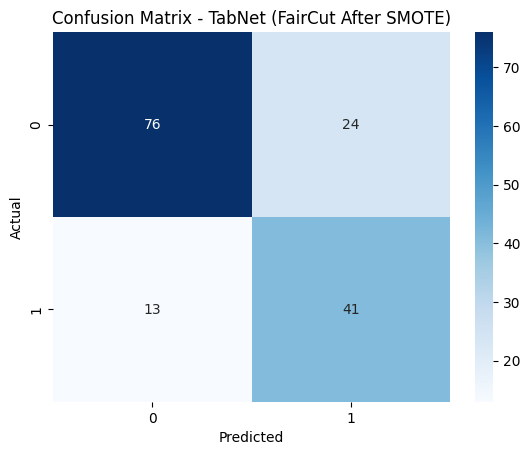

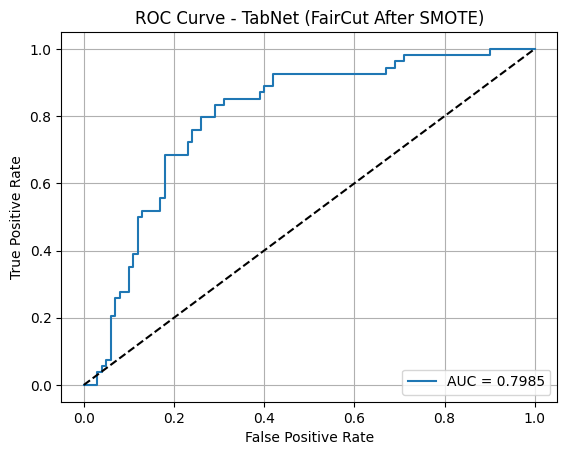

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       100
           1       0.63      0.76      0.69        54

    accuracy                           0.76       154
   macro avg       0.74      0.76      0.75       154
weighted avg       0.78      0.76      0.76       154

📊 Key Metrics:
Accuracy:  0.7597
Precision: 0.6308
Recall:    0.7593
F1 Score:  0.6891
ROC AUC:   0.7985

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2407
False Positive Rate (FPR): 0.2400
Balanced Error Rate (BER): 0.2404


In [32]:
# === Prepare data ===
X_train_tab_res = Xf_train_res.astype(np.float32)
X_test_tab = Xf_test_scaled.astype(np.float32)
y_train_tab_res = np.array(yf_train_res).astype(int)
y_test_tab = np.array(yf_test).astype(int)

# === Class weights ===
weights_after = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_tab_res), y=y_train_tab_res)
weights_after_tensor = torch.tensor(weights_after, dtype=torch.float32)

# === Define TabNet ===
tabnet_fc_after = TabNetClassifier(
    n_d=8, n_a=8, n_steps=3,
    gamma=1.3,
    lambda_sparse=1e-3,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    scheduler_params={"step_size": 10, "gamma": 0.9},
    mask_type='entmax',
    seed=42,
    verbose=10
)

# === Train ===
tabnet_fc_after.fit(
    X_train=X_train_tab_res, y_train=y_train_tab_res,
    eval_set=[(X_train_tab_res, y_train_tab_res), (X_test_tab, y_test_tab)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss(weight=weights_after_tensor)
)

# === Predict and Evaluate ===
y_pred_after = tabnet_fc_after.predict(X_test_tab)
y_proba_after = tabnet_fc_after.predict_proba(X_test_tab)[:, 1]

evaluate_model(y_test_tab, y_pred_after, y_proba_after, model_name="TabNet (FairCut After SMOTE)")


In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_tabnet_feature_importance(model, feature_names, title="TabNet Feature Importances"):
    """
    Plot global feature importances from a trained TabNetClassifier.

    Parameters:
    - model: trained TabNetClassifier object
    - feature_names: list of strings for feature names (must match order used in training)
    - title: optional title for the plot
    """
    try:
        importances = model.feature_importances_
    except AttributeError:
        raise ValueError("Model must be a trained TabNetClassifier with feature_importances_ attribute.")

    if len(importances) != len(feature_names):
        raise ValueError("Length of feature_names must match number of features used to train the model.")

    sorted_idx = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
    plt.title(title)
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()


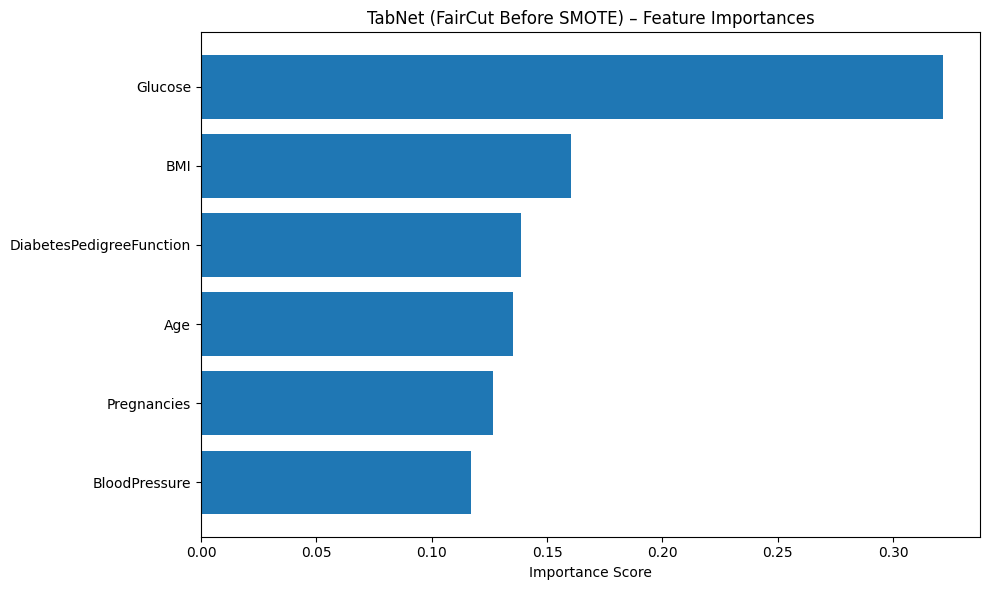

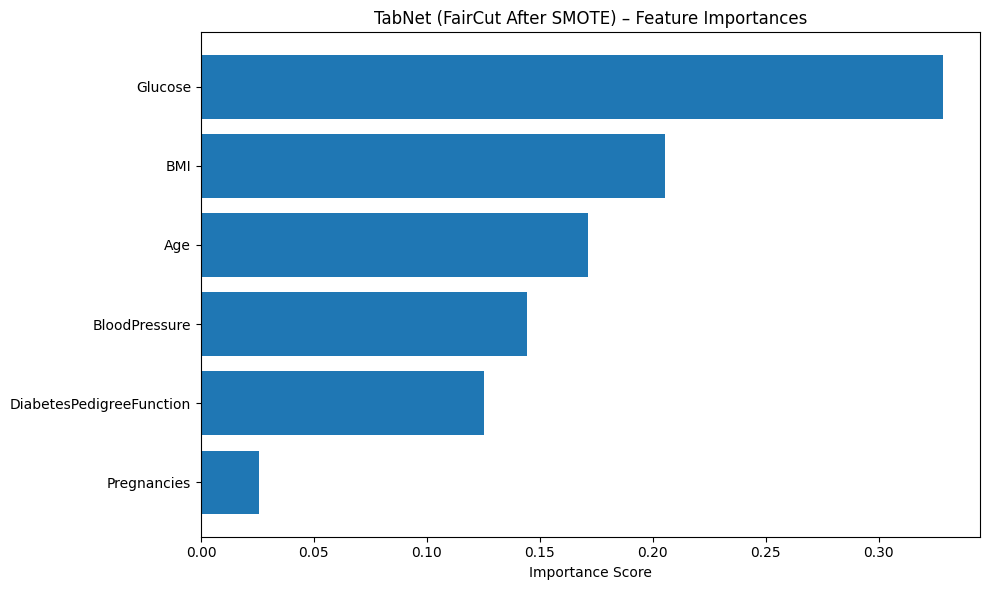

In [34]:
# For FairCut Imputed Before SMOTE
plot_tabnet_feature_importance(
    model=tabnet_fc_before,
    feature_names=['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction'],
    title="TabNet (FairCut Before SMOTE) – Feature Importances"
)

# For FairCut Imputed After SMOTE
plot_tabnet_feature_importance(
    model=tabnet_fc_after,
    feature_names=['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction'],
    title="TabNet (FairCut After SMOTE) – Feature Importances"
)


In [35]:
!pip install optuna --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 9.4 MB/s eta 0:00:00


In [36]:
import optuna
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score
import torch

def objective(trial):
    # Sample hyperparameters
    n_d = trial.suggest_categorical("n_d", [8, 16, 24, 32])
    n_a = trial.suggest_categorical("n_a", [8, 16, 24, 32])
    n_steps = trial.suggest_int("n_steps", 3, 7)
    gamma = trial.suggest_float("gamma", 1.0, 2.0)
    lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
    lr = trial.suggest_float("lr", 0.005, 0.03)

    # Build model
    model = TabNetClassifier(
        n_d=n_d,
        n_a=n_a,
        n_steps=n_steps,
        gamma=gamma,
        lambda_sparse=lambda_sparse,
        optimizer_fn=torch.optim.Adam,
        optimizer_params={"lr": lr},
        mask_type='entmax',
        seed=42,
        verbose=0
    )

    # Train model
    model.fit(
        X_train=Xf_train_scaled, y_train=yf_train.values,
        eval_set=[(Xf_test_scaled, yf_test.values)],
        eval_name=["val"],
        eval_metric=["auc"],
        max_epochs=150,
        patience=20,
        batch_size=64,
        virtual_batch_size=16,
        num_workers=0,
        drop_last=False,
        loss_fn=torch.nn.CrossEntropyLoss()
    )

    # Evaluate on test set
    preds = model.predict_proba(Xf_test_scaled)[:, 1]
    auc = roc_auc_score(yf_test, preds)
    return auc


In [37]:
study = optuna.create_study(direction="maximize", study_name="TabNet_Tuning")
study.optimize(objective, n_trials=30)  # ⏱ adjust trials as needed


[I 2025-08-09 21:07:02,641] A new study created in memory with name: TabNet_Tuning
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 30 with best_epoch = 10 and best_val_auc = 0.83648


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:07:29,841] Trial 0 finished with value: 0.8364814814814814 and parameters: {'n_d': 24, 'n_a': 24, 'n_steps': 4, 'gamma': 1.7031424052462185, 'lambda_sparse': 1.098898980929308e-05, 'lr': 0.02284908406169426}. Best is trial 0 with value: 0.8364814814814814.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 58 with best_epoch = 38 and best_val_auc = 0.81907


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:08:25,455] Trial 1 finished with value: 0.8190740740740741 and parameters: {'n_d': 24, 'n_a': 16, 'n_steps': 5, 'gamma': 1.6875609985665383, 'lambda_sparse': 0.00032332721123784383, 'lr': 0.014803083865433615}. Best is trial 0 with value: 0.8364814814814814.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 29 with best_epoch = 9 and best_val_auc = 0.81593


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:08:40,764] Trial 2 finished with value: 0.8159259259259259 and parameters: {'n_d': 8, 'n_a': 8, 'n_steps': 6, 'gamma': 1.3292212915319495, 'lambda_sparse': 5.963404177150871e-05, 'lr': 0.022538772982954914}. Best is trial 0 with value: 0.8364814814814814.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:08:49,085] Trial 3 finished with value: 0.8185185185185184 and param


Early stopping occurred at epoch 24 with best_epoch = 4 and best_val_auc = 0.81852


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 28 with best_epoch = 8 and best_val_auc = 0.82537


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:09:02,670] Trial 4 finished with value: 0.8253703703703704 and parameters: {'n_d': 32, 'n_a': 24, 'n_steps': 5, 'gamma': 1.618087967371019, 'lambda_sparse': 1.6618078729298013e-05, 'lr': 0.00526895910889502}. Best is trial 0 with value: 0.8364814814814814.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 36 with best_epoch = 16 and best_val_auc = 0.83315


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:09:22,932] Trial 5 finished with value: 0.8331481481481481 and parameters: {'n_d': 32, 'n_a': 24, 'n_steps': 6, 'gamma': 1.130639584843805, 'lambda_sparse': 0.0007600977786111152, 'lr': 0.022133663489631746}. Best is trial 0 with value: 0.8364814814814814.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:09:46,945] Trial 6 finished with value: 0.8522222222222222 and para


Early stopping occurred at epoch 81 with best_epoch = 61 and best_val_auc = 0.85222


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 57 with best_epoch = 37 and best_val_auc = 0.83056


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:10:19,283] Trial 7 finished with value: 0.8305555555555556 and parameters: {'n_d': 24, 'n_a': 16, 'n_steps': 4, 'gamma': 1.4348066727378643, 'lambda_sparse': 1.724318538131929e-06, 'lr': 0.018994946857136746}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:10:53,339] Trial 8 finished with value: 0.8416666666666667 and par


Early stopping occurred at epoch 96 with best_epoch = 76 and best_val_auc = 0.84167


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 33 with best_epoch = 13 and best_val_auc = 0.81833


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:11:13,496] Trial 9 finished with value: 0.8183333333333332 and parameters: {'n_d': 16, 'n_a': 16, 'n_steps': 7, 'gamma': 1.2535645038995482, 'lambda_sparse': 8.20103990237143e-05, 'lr': 0.02037796605951734}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:11:27,288] Trial 10 finished with value: 0.8283333333333334 and para


Early stopping occurred at epoch 44 with best_epoch = 24 and best_val_auc = 0.82833


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:11:43,878] Trial 11 finished with value: 0.7916666666666666 and parameters: {'n_d': 8, 'n_a': 8, 'n_steps': 3, 'gamma': 1.492685207138607, 'lambda_sparse': 0.0001662483220569705, 'lr': 0.005966393967034965}. Best is trial 6 with value: 0.8522222222222222.



Early stopping occurred at epoch 57 with best_epoch = 37 and best_val_auc = 0.79167


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:12:06,162] Trial 12 finished with value: 0.832037037037037 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 3, 'gamma': 1.8764581611834112, 'lambda_sparse': 0.000179274061345934, 'lr': 0.009820957766828679}. Best is trial 6 with value: 0.8522222222222222.



Early stopping occurred at epoch 74 with best_epoch = 54 and best_val_auc = 0.83204


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:12:27,685] Trial 13 finished with value: 0.8312962962962962 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 4, 'gamma': 1.3428477727337353, 'lambda_sparse': 3.234427615686823e-05, 'lr': 0.029237771774360013}. Best is trial 6 with value: 0.8522222222222222.



Early stopping occurred at epoch 57 with best_epoch = 37 and best_val_auc = 0.8313


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:12:40,349] Trial 14 finished with value: 0.8159259259259259 and parameters: {'n_d': 8, 'n_a': 32, 'n_steps': 3, 'gamma': 1.5680615559020474, 'lambda_sparse': 0.0007860062182394752, 'lr': 0.015512247004302338}. Best is trial 6 with value: 0.8522222222222222.



Early stopping occurred at epoch 40 with best_epoch = 20 and best_val_auc = 0.81593


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:12:52,101] Trial 15 finished with value: 0.8262962962962963 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 5, 'gamma': 1.2146480161685984, 'lambda_sparse': 0.0001624296135739426, 'lr': 0.025538067191480582}. Best is trial 6 with value: 0.8522222222222222.



Early stopping occurred at epoch 26 with best_epoch = 6 and best_val_auc = 0.8263


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 51 with best_epoch = 31 and best_val_auc = 0.81259


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:13:10,408] Trial 16 finished with value: 0.8125925925925926 and parameters: {'n_d': 8, 'n_a': 8, 'n_steps': 4, 'gamma': 1.423221994474326, 'lambda_sparse': 6.7045770613729264e-06, 'lr': 0.010850443297642225}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:13:17,866] Trial 17 finished with value: 0.8181481481481482 and par


Early stopping occurred at epoch 22 with best_epoch = 2 and best_val_auc = 0.81815


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:13:42,822] Trial 18 finished with value: 0.8194444444444444 and parameters: {'n_d': 8, 'n_a': 32, 'n_steps': 4, 'gamma': 1.5927941841015196, 'lambda_sparse': 0.0003464107923882564, 'lr': 0.008327122762066251}. Best is trial 6 with value: 0.8522222222222222.



Early stopping occurred at epoch 65 with best_epoch = 45 and best_val_auc = 0.81944


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 40 with best_epoch = 20 and best_val_auc = 0.82111


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:14:03,246] Trial 19 finished with value: 0.8211111111111111 and parameters: {'n_d': 16, 'n_a': 8, 'n_steps': 6, 'gamma': 1.36543868102024, 'lambda_sparse': 8.514174927164609e-05, 'lr': 0.024795116137569462}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:14:19,277] Trial 20 finished with value: 0.8096296296296296 and para


Early stopping occurred at epoch 50 with best_epoch = 30 and best_val_auc = 0.80963


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:14:41,638] Trial 21 finished with value: 0.8233333333333334 and parameters: {'n_d': 24, 'n_a': 24, 'n_steps': 4, 'gamma': 1.7165631964731936, 'lambda_sparse': 8.62142144626208e-06, 'lr': 0.026354701649352656}. Best is trial 6 with value: 0.8522222222222222.



Early stopping occurred at epoch 49 with best_epoch = 29 and best_val_auc = 0.82333


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 56 with best_epoch = 36 and best_val_auc = 0.84389


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:15:08,878] Trial 22 finished with value: 0.8438888888888889 and parameters: {'n_d': 24, 'n_a': 24, 'n_steps': 5, 'gamma': 1.7243883568416474, 'lambda_sparse': 1.4260188069650757e-05, 'lr': 0.022515175678915356}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 26 with best_epoch = 6 and best_val_auc = 0.81796


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:15:21,748] Trial 23 finished with value: 0.817962962962963 and parameters: {'n_d': 24, 'n_a': 24, 'n_steps': 5, 'gamma': 1.8213651054049422, 'lambda_sparse': 1.8016561084581843e-05, 'lr': 0.01751623132125805}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:16:01,018] Trial 24 finished with value: 0.84 and parameters: {'n_


Early stopping occurred at epoch 83 with best_epoch = 63 and best_val_auc = 0.84


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 25 with best_epoch = 5 and best_val_auc = 0.82167


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:16:17,038] Trial 25 finished with value: 0.8216666666666667 and parameters: {'n_d': 24, 'n_a': 24, 'n_steps': 7, 'gamma': 1.6445484955739824, 'lambda_sparse': 1.0898071743055668e-06, 'lr': 0.0271693169567149}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 51 with best_epoch = 31 and best_val_auc = 0.82222


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:16:41,423] Trial 26 finished with value: 0.8222222222222222 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 5, 'gamma': 1.2600876130972174, 'lambda_sparse': 4.898325603595499e-05, 'lr': 0.023756520328733537}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)



Early stopping occurred at epoch 29 with best_epoch = 9 and best_val_auc = 0.81352


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:16:57,501] Trial 27 finished with value: 0.8135185185185185 and parameters: {'n_d': 32, 'n_a': 16, 'n_steps': 6, 'gamma': 1.5625551540221527, 'lambda_sparse': 2.0304183924229458e-05, 'lr': 0.021531881333978646}. Best is trial 6 with value: 0.8522222222222222.
/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:17:20,030] Trial 28 finished with value: 0.8220370370370371 and 


Early stopping occurred at epoch 58 with best_epoch = 38 and best_val_auc = 0.82204


/tmp/ipython-input-2397044741.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lambda_sparse = trial.suggest_loguniform("lambda_sparse", 1e-6, 1e-3)
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-08-09 21:17:32,898] Trial 29 finished with value: 0.8140740740740741 and parameters: {'n_d': 24, 'n_a': 24, 'n_steps': 4, 'gamma': 1.9553170436963963, 'lambda_sparse': 1.252044637091096e-05, 'lr': 0.01553698883872848}. Best is trial 6 with value: 0.8522222222222222.



Early stopping occurred at epoch 32 with best_epoch = 12 and best_val_auc = 0.81407


In [38]:
print(" Best AUC:", study.best_value)
print(" Best Params:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")


 Best AUC: 0.8522222222222222
 Best Params:
n_d: 16
n_a: 8
n_steps: 3
gamma: 1.4490144895624746
lambda_sparse: 9.659328686785888e-05
lr: 0.021487121928223413


In [39]:
# Separate lr from best_params before unpacking
best_params = study.best_params.copy()
lr = best_params.pop("lr")

# Create and train TabNet on SMOTE-balanced data
tabnet_fc_smote_tuned = TabNetClassifier(
    **best_params,
    optimizer_fn=torch.optim.Adam,
    optimizer_params={"lr": lr},
    mask_type='entmax',
    seed=42,
    verbose=10
)

# Fit on SMOTE-resampled FairCut dataset
tabnet_fc_smote_tuned.fit(
    X_train=Xf_train_res, y_train=yf_train_res.values,
    eval_set=[(Xf_train_res, yf_train_res.values), (Xf_test_scaled, yf_test.values)],
    eval_name=['train', 'val'],
    eval_metric=['auc', 'accuracy'],
    max_epochs=200,
    patience=30,
    batch_size=64,
    virtual_batch_size=16,
    num_workers=0,
    drop_last=False,
    loss_fn=torch.nn.CrossEntropyLoss()
)


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.80613 | train_auc: 0.80998 | train_accuracy: 0.71125 | val_auc: 0.72463 | val_accuracy: 0.65584 |  0:00:00s
epoch 10 | loss: 0.47724 | train_auc: 0.88626 | train_accuracy: 0.8075  | val_auc: 0.80537 | val_accuracy: 0.7013  |  0:00:15s
epoch 20 | loss: 0.45254 | train_auc: 0.90728 | train_accuracy: 0.83125 | val_auc: 0.79926 | val_accuracy: 0.73377 |  0:00:29s
epoch 30 | loss: 0.43847 | train_auc: 0.90022 | train_accuracy: 0.80375 | val_auc: 0.81944 | val_accuracy: 0.75325 |  0:00:40s
epoch 40 | loss: 0.44291 | train_auc: 0.91746 | train_accuracy: 0.83875 | val_auc: 0.80037 | val_accuracy: 0.72078 |  0:00:51s
epoch 50 | loss: 0.40718 | train_auc: 0.92246 | train_accuracy: 0.84125 | val_auc: 0.81981 | val_accuracy: 0.74026 |  0:01:01s

Early stopping occurred at epoch 57 with best_epoch = 27 and best_val_accuracy = 0.77273


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



=== 🔍 Evaluation for: TabNet (FairCut SMOTE Tuned) ===



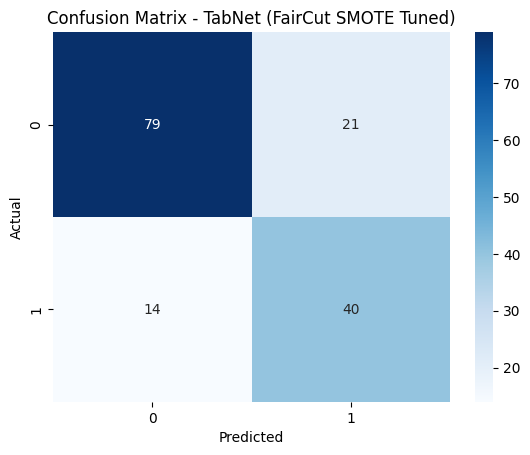

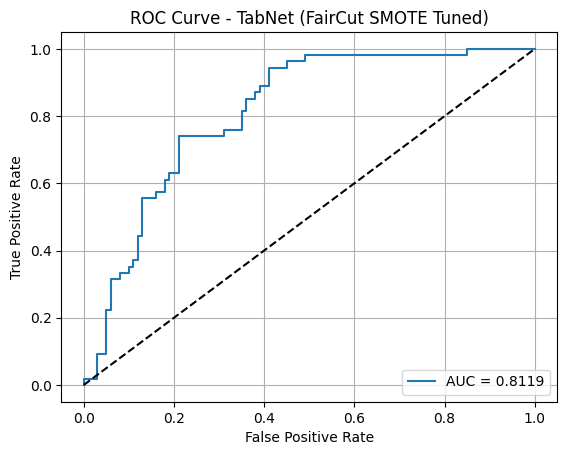

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       100
           1       0.66      0.74      0.70        54

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.76       154
weighted avg       0.78      0.77      0.78       154

📊 Key Metrics:
Accuracy:  0.7727
Precision: 0.6557
Recall:    0.7407
F1 Score:  0.6957
ROC AUC:   0.8119

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2593
False Positive Rate (FPR): 0.2100
Balanced Error Rate (BER): 0.2346


In [40]:
# Predict on FairCut test set
y_pred_tabnet = tabnet_fc_smote_tuned.predict(Xf_test_scaled)
y_proba_tabnet = tabnet_fc_smote_tuned.predict_proba(Xf_test_scaled)[:, 1]

# Evaluate using your custom evaluation function
evaluate_model(yf_test, y_pred_tabnet, y_proba_tabnet, model_name="TabNet (FairCut SMOTE Tuned)")


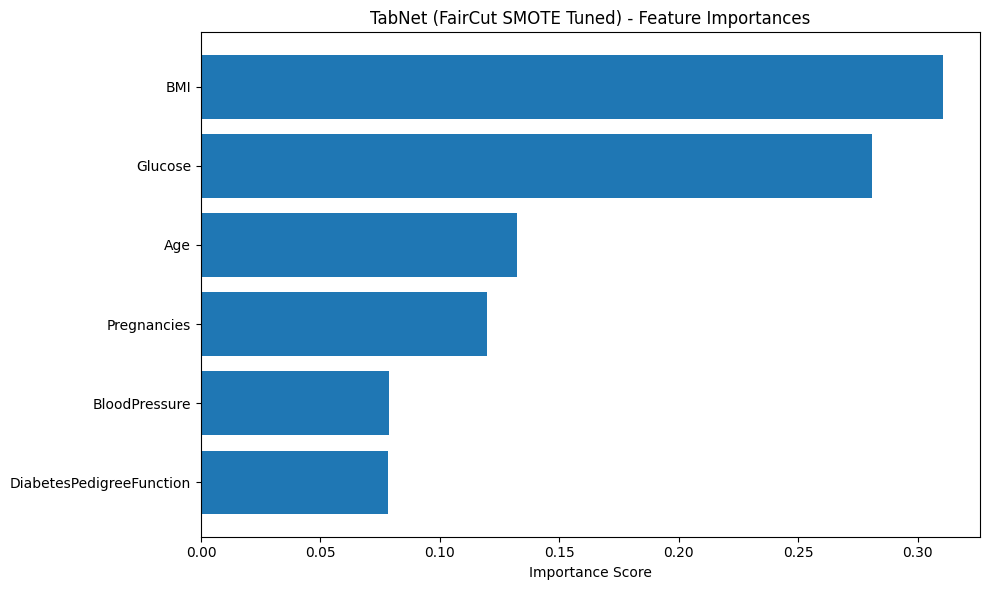

In [41]:
def plot_tabnet_feature_importance(model, feature_names, title="TabNet Feature Importances"):
    importances = model.feature_importances_

    if len(importances) != len(feature_names):
        raise ValueError("Mismatch between feature names and importance length.")

    sorted_idx = np.argsort(importances)

    plt.figure(figsize=(10, 6))
    plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx])
    plt.title(title)
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

# Call the function for the tuned model
plot_tabnet_feature_importance(
    model=tabnet_fc_smote_tuned,
    feature_names=['Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction'],
    title="TabNet (FairCut SMOTE Tuned) - Feature Importances"
)


In [42]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=f593a8263083c526cb20e25769db728fc41c9c8b53bb8ee1dc1d75b6aff943e6
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [43]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Assuming your data is already prepared and is in NumPy arrays
X_train_np = Xf_train_res  # Directly using NumPy array
X_test_np = Xf_test_scaled  # Directly using NumPy array

# Provide the feature names directly if using NumPy arrays
feature_names = ['pregnancies', 'glucose', 'blood pressure', 'skinthickness', 'insulin', 'BMI', 'dpf', 'age']  # Example list of features

# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train_np,
    mode="classification",
    training_labels=yf_train_res.values,  # Ensure labels are in a compatible format (NumPy array)
    class_names=['negative', 'positive'],
    feature_names=feature_names,  # Provide the feature names directly
    verbose=True,
    random_state=42
)

# Choose an instance from the test set to explain
idx = 5  # Randomly selected index
instance = Xf_test_scaled[idx]  # No need to use .iloc for NumPy arrays

# Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    instance,
    tabnet_fc_smote_tuned.predict_proba,  # TabNet prediction function
    num_features=10  # Number of top features to show
)

# Display the explanation
explanation.show_in_notebook(show_table=True, show_all=False)


Intercept 0.543638480486712
Prediction_local [0.32169683]
Right: 0.53616124


In [44]:
# Define binary age group as sensitive feature
age_group = (Xf_test['age'] >= 50).astype(int)


In [45]:
import numpy as np

# Get probabilities from TabNet
tabnet_probs = tabnet_fc_smote_tuned.predict_proba(Xf_test_scaled)

# Convert to class predictions using threshold 0.5
tabnet_preds = (tabnet_probs[:, 1] >= 0.5).astype(int)


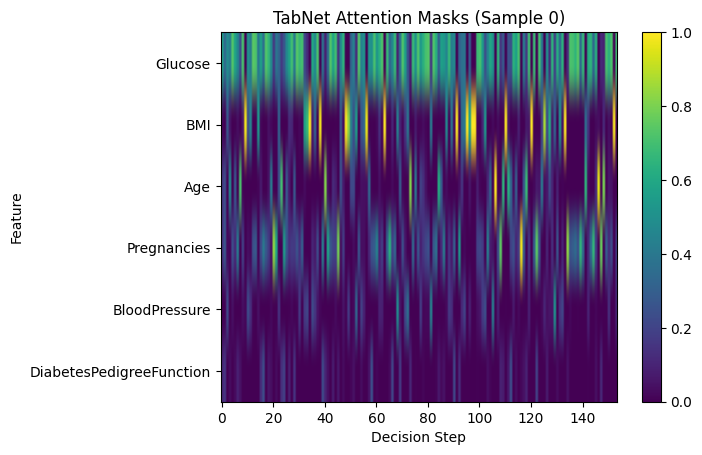

In [46]:
# explain_matrix.shape => (n_samples, n_features)
explain_matrix, masks = tabnet_fc_smote_tuned.explain(Xf_test_scaled)

plt.imshow(masks[0].T, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("TabNet Attention Masks (Sample 0)")
plt.xlabel("Decision Step")
plt.ylabel("Feature")

# Add feature labels
plt.yticks(ticks=np.arange(6), labels=[
    'Glucose', 'BMI', 'Age', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction'
])

plt.show()


# FT Transformer

In [47]:
!pip install rtdl --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
accelerate 1.9.0 requires torch>=2.0.0, but you have torch 1.13.1 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,

In [48]:
import torch
from torch import nn
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader


# === Before SMOTE ===
X_train_ft = torch.tensor(Xf_train_scaled, dtype=torch.float32)
y_train_ft = torch.tensor(yf_train.values, dtype=torch.long)

X_test_ft = torch.tensor(Xf_test_scaled, dtype=torch.float32)
y_test_ft = torch.tensor(yf_test.values, dtype=torch.long)

# === After SMOTE ===
X_train_ft_res = torch.tensor(Xf_train_res, dtype=torch.float32)
y_train_ft_res = torch.tensor(yf_train_res.values, dtype=torch.long)


In [49]:
import rtdl

# For all-numerical inputs (no categorical features):
n_num_features = X_train_ft.shape[1]
cat_cardinalities = []  # No categorical features

model_ft = rtdl.FTTransformer.make_baseline(
    n_num_features=n_num_features,
    cat_cardinalities=cat_cardinalities,
    d_token=64,
    n_blocks=3,
    attention_dropout=0.2,
    ffn_d_hidden=128,          # Reasonable default, tune if needed
    ffn_dropout=0.2,
    residual_dropout=0.0,      # Usually 0.0 is fine for FT
    d_out=len(torch.unique(y_train_ft)), # Number of output classes
)


Epoch 1, Loss: 5.9030
Epoch 2, Loss: 5.0647
Epoch 3, Loss: 4.8364
Epoch 4, Loss: 4.4446
Epoch 5, Loss: 4.5282
Epoch 6, Loss: 4.4619
Epoch 7, Loss: 4.7233
Epoch 8, Loss: 4.4713
Epoch 9, Loss: 4.5271
Epoch 10, Loss: 4.2233

=== 🔍 Evaluation for: FT-Transformer (FairCut Before SMOTE) ===



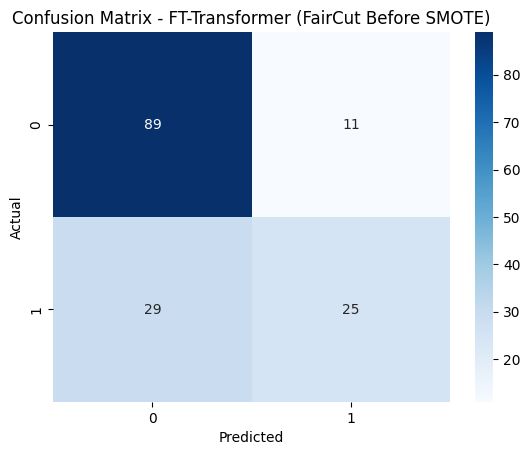

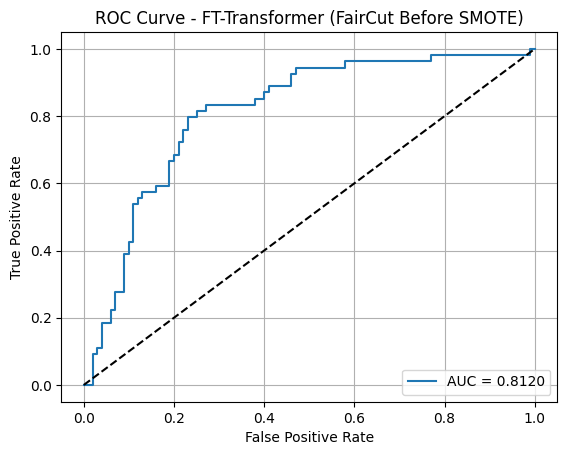

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       100
           1       0.69      0.46      0.56        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154

📊 Key Metrics:
Accuracy:  0.7403
Precision: 0.6944
Recall:    0.4630
F1 Score:  0.5556
ROC AUC:   0.8120

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.5370
False Positive Rate (FPR): 0.1100
Balanced Error Rate (BER): 0.3235


In [50]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

# === 1. Prepare data loader for Before SMOTE ===
train_ds_before = TensorDataset(X_train_ft, y_train_ft)
train_loader_before = DataLoader(train_ds_before, batch_size=64, shuffle=True)

# === 2. Optimizer & Loss Function ===
optimizer = torch.optim.AdamW(model_ft.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# === 3. Training loop for Before SMOTE ===
model_ft.train()
for epoch in range(10):  # number of epochs
    epoch_loss = 0
    for xb, yb in train_loader_before:
        optimizer.zero_grad()

        # Pass None for categorical data as we're not using categorical features
        xb_cat = None
        preds = model_ft(xb, xb_cat)  # x_num (xb) and x_cat (None)

        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# === 4. Evaluate the trained model on test set ===
model_ft.eval()
with torch.no_grad():
    logits = model_ft(X_test_ft, None)  # Pass None for categorical data
    y_pred = logits.argmax(dim=1).numpy()
    y_proba = F.softmax(logits, dim=1)[:, 1].numpy()

evaluate_model(yf_test, y_pred, y_proba, model_name="FT-Transformer (FairCut Before SMOTE)")


Epoch 1, Loss: 6.2061
Epoch 2, Loss: 6.0002
Epoch 3, Loss: 5.8314
Epoch 4, Loss: 5.7735
Epoch 5, Loss: 5.4714
Epoch 6, Loss: 5.4105
Epoch 7, Loss: 5.5638
Epoch 8, Loss: 5.6570
Epoch 9, Loss: 5.5500
Epoch 10, Loss: 5.3673

=== 🔍 Evaluation for: FT-Transformer (FairCut After SMOTE) ===



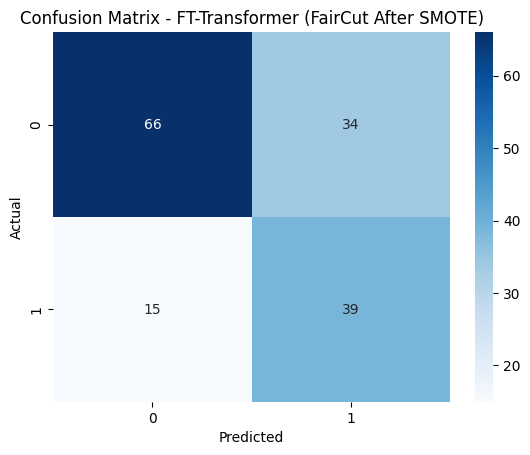

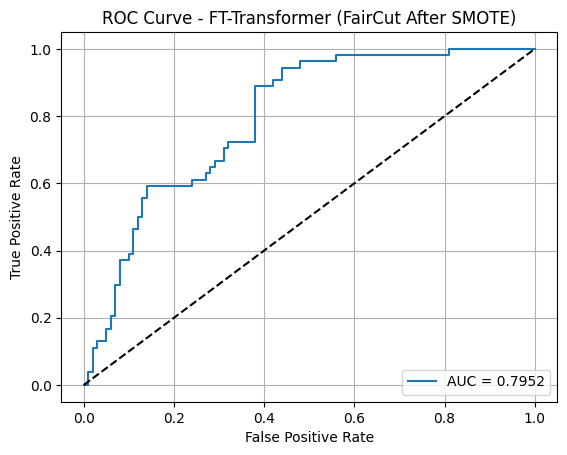

🔢 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       100
           1       0.53      0.72      0.61        54

    accuracy                           0.68       154
   macro avg       0.67      0.69      0.67       154
weighted avg       0.72      0.68      0.69       154

📊 Key Metrics:
Accuracy:  0.6818
Precision: 0.5342
Recall:    0.7222
F1 Score:  0.6142
ROC AUC:   0.7952

⚖️ Fairness Metrics:
False Negative Rate (FNR): 0.2778
False Positive Rate (FPR): 0.3400
Balanced Error Rate (BER): 0.3089


In [51]:
# === 1. Prepare data loader for After SMOTE ===
train_ds_after = TensorDataset(X_train_ft_res, y_train_ft_res)
train_loader_after = DataLoader(train_ds_after, batch_size=64, shuffle=True)

# === 2. Optimizer & Loss Function ===
optimizer = torch.optim.AdamW(model_ft.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

# === 3. Training loop for After SMOTE ===
model_ft.train()
for epoch in range(10):  # number of epochs
    epoch_loss = 0
    for xb, yb in train_loader_after:
        optimizer.zero_grad()

        # Pass None for categorical data as we're not using categorical features
        xb_cat = None
        preds = model_ft(xb, xb_cat)  # x_num (xb) and x_cat (None)

        loss = loss_fn(preds, yb)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

# === 4. Evaluate the trained model on test set ===
model_ft.eval()
with torch.no_grad():
    logits = model_ft(X_test_ft, None)  # Pass None for categorical data
    y_pred = logits.argmax(dim=1).numpy()
    y_proba = F.softmax(logits, dim=1)[:, 1].numpy()

evaluate_model(yf_test, y_pred, y_proba, model_name="FT-Transformer (FairCut After SMOTE)")
